# WH Plots

In [27]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import mplhep as hep
import warnings
from plot_utils import *

warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'figure.max_open_warning': 0})
matplotlib.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 70
plt.style.use(hep.style.CMS)
hep.style.use("CMS")

## Notebook Parameters
The following couple cells define the input and output directories, and load in the desired .pkl files into the `plots` nested dictionary.<br>
`output_label`: _str_, saves plots as `<output_label>+<plot_name>.<file_ext>`.<br>
`file_ext`: _str_, see above.<br>

In [28]:
# output parameters
output_label = '/home/submit/lavezzo/public_html/SUEP/plots/debug/'
file_ext = '.pdf'
saveFigs = False

# create output dir
if not os.path.isdir(output_label): 
    print("Creating", output_label)
    os.mkdir(output_label)

The `plots` dictionary is used to store all the plots imported from the pickle files. Dimensions: (sample) x (plot label) <br> 
<br>
The `loader` function in `plot_utils.py` automatically merges bins and years, applies the lumis, the xsec for SUEP, and excludes some of the low QCD bins.<br>

In [29]:
# This part is meant to be flxeible, depending on what you want to import

# generate list of files that you want to merge histograms for
hist_dir = '/ceph/submit/data/user/l/lavezzo/SUEP/outputs/'
files = []
#files += getHistLists(hist_dir, "WH_9_10_CRWJ", "../filelist/WH/list_2018_MC_WH.txt", file_ext=".pkl")
#files += getHistLists(hist_dir, "WH_9_10_CRWJ", "../filelist/WH/list_2018_Data_WH.txt", file_ext=".pkl")

files_vrgj = []
files_vrgj += getHistLists(hist_dir, "WH_9_11_VRGJhighS", "../filelist/WH/list_2018_VRGJ.txt", file_ext=".pkl")
#files_vrgj += getHistLists(hist_dir, "WH_9_11_VRGJhighS", "../generic.txt", file_ext=".pkl")

# exclude the low pT QCD sample
files = [f for f in files if ("QCD_Pt_15to30" not in f) and ("QCD_Pt_30to50" not in f) and ("QCD_Pt_50to80" not in f)]
files_vrgj = [f for f in files_vrgj if ("QCD_Pt_15to30" not in f) and ("QCD_Pt_30to50" not in f) and ("QCD_Pt_50to80" not in f)]

bkgs = [
    "VH",
    "ttX",
    "VVV",
    "VG",
    "ST",
    "VV",
    "QCD_Pt",
    "DYJetsToLL_LHEFilterPtZ",
    "tt",
    "WJetsToLNu_Pt",
    "WJetsToLNu_incl"
]
bkgs_vrgj = [
    'WJetsToLNu_Pt',
    'GJets_HT',
    'QCD_Pt',
    #'WJetsToLNu_incl',
]
data = [
    "SingleMuon",
    "EGamma"
]

In [30]:
# load histograms, merge binned samples, apply lumis (and xsections for SUEP samples)
# output dimensions: (sample) x (plot label)
plots = loader(files, by_bin=True, verbose=True, load_cutflows=True)
plots_vrgj = loader(files_vrgj, by_bin=True, verbose=True, load_cutflows=True)

# make an 'MC' sample formed of summing different backgrounds
#plots = combineSamples(plots, samples=bkgs, new_tag='MC')
# plots = combineSamples(plots, samples=data, new_tag='data')
plots_vrgj = combineSamples(plots_vrgj, samples=bkgs_vrgj, new_tag='MC-VRGJ')

Finished loading all files
Loading /ceph/submit/data/user/l/lavezzo/SUEP/outputs/GJets_HT-40To100_TuneCP5_13TeV-madgraphMLM-pythia8+RunIISummer20UL18MiniAODv2-106X_upgrade2018_realistic_v16_L1v1-v2+MINIAODSIM_WH_9_11_VRGJhighS.pkl
	Found era 2018
	Found sample GJets_HT
	Found bin GJets_HT-40To100
	Finished loading sample
Loading /ceph/submit/data/user/l/lavezzo/SUEP/outputs/GJets_HT-100To200_TuneCP5_13TeV-madgraphMLM-pythia8+RunIISummer20UL18MiniAODv2-4cores5k_106X_upgrade2018_realistic_v16_L1v1-v2+MINIAODSIM_WH_9_11_VRGJhighS.pkl
	Found era 2018
	Found sample GJets_HT
	Found bin GJets_HT-100To200
	Finished loading sample
Loading /ceph/submit/data/user/l/lavezzo/SUEP/outputs/GJets_HT-200To400_TuneCP5_13TeV-madgraphMLM-pythia8+RunIISummer20UL18MiniAODv2-106X_upgrade2018_realistic_v16_L1v1-v2+MINIAODSIM_WH_9_11_VRGJhighS.pkl
	Found era 2018
	Found sample GJets_HT
	Found bin GJets_HT-200To400
	Finished loading sample
Loading /ceph/submit/data/user/l/lavezzo/SUEP/outputs/GJets_HT-400To600_

These are all the samples loaded.

In [31]:
for k in sorted(list(plots.keys())): print(k)

## Data/MC Comparison

In [32]:
plot_labels = [
   'W_pt_CRWJ',
   'W_mt_CRWJ',
   'SUEP_nconst_CRWJ',
   'SUEP_S1_CRWJ'
]
samples = ['data', 'MC']
stacked_samples = bkgs
density = False

for plot_label in plot_labels:

    hlist = [plots[sample][plot_label][::1j] for sample in samples]
    stacked_hlist = [plots[sample][plot_label][::1j] for sample in stacked_samples]
    #hlist = [plots[sample][plot_label][100j:10000j:sum,:] for sample in samples]
    #stacked_hlist = [plots[sample][plot_label][100j:10000j:sum,:] for sample in stacked_samples]

    fig, axs = styled_plot_ratio(hlist, samples, stacked_hlist=stacked_hlist, stacked_labels=stacked_samples, density=density)
    axs[1].set_ylim(0.5, 1.5)
    #axs[0].set_xlim(20, 200)
    #axs[0].set_yscale('linear')

    region = plot_label.split("_")[-1]
    axs[0].text(0.97, 0.97, region,
                 transform=axs[0].transAxes, 
                  fontsize=24, fontweight='bold', va='top', ha='right')

    plt.show()

KeyError: 'data'

In [ ]:
print(plots['data']['deltaPhi_minDeltaPhiMETJet_MET_CRWJPF'][1.5j:].sum().value / plots['MC']['deltaPhi_minDeltaPhiMETJet_MET_CRWJPF'][1.5j:].sum().value)
print(plots['data']['deltaPhi_minDeltaPhiMETJet_MET_CRTTPF'][1.5j:].sum().value / plots['MC']['deltaPhi_minDeltaPhiMETJet_MET_CRTTPF'][1.5j:].sum().value)

In [ ]:
print(plots['data']['MET_pt_noCut_MET_pt_>_30.0_AK15PF'][:].sum().value / plots['MC']['MET_pt_noCut_MET_pt_>_30.0_AK15PF'][:].sum().value)
print(plots['data']['MET_pt_noCut_MET_pt_>_30.0_AK15PF'][30j:].sum().value / plots['MC']['MET_pt_noCut_MET_pt_>_30.0_AK15PF'][30j:].sum().value)

In [ ]:
print(plots['data']['bjetSel_noCut_bjetSel_==_0.0_CRTT'][0j:1j].sum().value / plots['MC']['bjetSel_noCut_bjetSel_==_0.0_CRTT'][0j:1j].sum().value)
print(plots['data']['bjetSel_noCut_bjetSel_==_0.0_CRTT'][1j:2j].sum().value / plots['MC']['bjetSel_noCut_bjetSel_==_0.0_CRTT'][1j:2j].sum().value)

In [ ]:
print(plots['data']['ngood_fastjets_NOAK15b'][:].sum().value / plots['MC']['ngood_fastjets_NOAK15b'][:].sum().value)
print(plots['data']['ngood_fastjets_NOAK15nb'][:].sum().value / plots['MC']['ngood_fastjets_NOAK15nb'][:].sum().value)
print(plots['data']['ngood_fastjets_NOAK15'][:].sum().value / plots['MC']['ngood_fastjets_NOAK15'][:].sum().value)

print(plots['data']['ngood_fastjets_NOAK15b'][1j:].sum().value / plots['MC']['ngood_fastjets_NOAK15b'][1j:].sum().value)
print(plots['data']['ngood_fastjets_NOAK15nb'][1j:].sum().value / plots['MC']['ngood_fastjets_NOAK15nb'][1j:].sum().value)
print(plots['data']['ngood_fastjets_NOAK15'][1j:].sum().value / plots['MC']['ngood_fastjets_NOAK15'][1j:].sum().value)


In [ ]:
print(plots['data']['lepton_pt_NOAK15'].sum().value / plots['tt']['lepton_pt_NOAK15'].sum().value)
print(plots['data']['PuppiMET_pt_NOAK15'].sum().value / plots['tt']['PuppiMET_pt_NOAK15'].sum().value)

In [ ]:
print(plots['data']['lepton_pt_NOAK15'].sum().value / plots['VV']['lepton_pt_NOAK15'].sum().value)
print(plots['data']['PuppiMET_pt_NOAK15'].sum().value / plots['VV']['PuppiMET_pt_NOAK15'].sum().value)

In [ ]:
plots['data']['SUEP_nconst_NOAK15'].sum(flow=True).value / plots['MC']['SUEP_nconst_NOAK15'].sum(flow=True).value

In [ ]:
plots['data']['SUEP_nconst_RAW'].sum(flow=True).value / plots['MC']['SUEP_nconst_RAW'].sum(flow=True).value

In [ ]:
plots['data']['SUEP_S1_RAW'].sum().value / plots['data']['SUEP_S1_NOAK15'].sum().value

In [ ]:
[k for k in plots['data'].keys() if 'cutflow' in k]

In [ ]:
plots['data']['cutflow_oneCluster']/plots['data']['cutflow_oneLepton']

In [ ]:
plots['MC']['cutflow_oneCluster']/plots['MC']['cutflow_oneLepton']

In [ ]:
print(plots['data']['cutflow_'])
print(plots['data']['cutflow_histmaker_total'])

In [ ]:
plots['WJetsToLNu_Pt-100To250']['SUEP_S1_NOAK15']

## SR

In [ ]:
from numpy.polynomial import polynomial as P

def poly_fit_hist2d(h, deg=1):
    z_values = h.values().flatten()
    x_centers = h.axes[0].centers
    y_centers = h.axes[1].centers
    x_values = np.array([])
    y_values = np.array([])
    for i in range(len(x_centers)):
        x_values = np.concatenate((x_values, np.ones_like(y_centers) * x_centers[i]))
    for _i in range(len(x_centers)):
        y_values = np.concatenate((y_values, y_centers))
    c, stats = P.polyfit(x_values,y_values,deg=deg, w=z_values, full=True)
    return c, stats

h2 = plots['MC']['2D_SUEP_S1_vs_SUEP_nconst_CRTT'][0.3j:,30j:]
print(poly_fit_hist2d(h2, 1)[1])
print(poly_fit_hist2d(h2, 2)[1])
print(poly_fit_hist2d(h2, 3)[1])
print(poly_fit_hist2d(h2, 4)[1])
print(hist2d_correlation(h2))

### Cutflows 

Print cutflow tables and plots.

In [ ]:
samples= ['WJets'] 
selections = [
    'total', 'goldenJSON', 'genCuts',
    'allTriggers',  'qualityFilters', 'orthogonality', 'oneTightLepton', 'oneCluster', 'twoTracksInCluster',
    'WH_MET_pt_>_30.0_CRWJ',
    'W_pt_>_40.0_CRWJ',
    "W_mt_<_130.0_CRWJ", "W_mt_>_30.0_CRWJ",
    'bjetSel_==_1.0_CRWJ',
    'deltaPhi_SUEP_W_>_1.5_CRWJ', 'deltaPhi_SUEP_MET_>_1.5_CRWJ', 'deltaPhi_lepton_SUEP_>_1.5_CRWJ',
    'cutflow_ak4jets_inSUEPcluster_n_HighestPT_>=_1.0_CRWJ',
    'W_SUEP_BV_<_2.0_CRWJ',
    'deltaPhi_minDeltaPhiMETJet_MET_>_1.5_CRWJ',
]
selection_labels = [
    'Total','goldenJSON','Gen cuts',
    'Triggers', 'Quality filters', 'ZH & ggF orthogonality', 'One tight lepton', 'One AK15 cluster', 'Two tracks in AK15 cluster',
    'MET pT > 30 GeV',
    'W pT > 40 GeV',
    "W mT < 130 GeV", "W mT > 30 GeV",
    '0 tight b-tagged jet & < 2 loose b-tagged jets',
    'deltaPhi(SUEP, W) > 1.5', 'deltaPhi(SUEP, MET) > 1.5', 'deltaPhi(lepton, SUEP) > 1.5',
    '> 0 AK4 jets inside SUEP cluster',
    'BV(W, SUEP) < 2.0',
    'deltaPhi(minDeltaPhiMETJet, MET) > 1.5',
]

table = cutflow_table(plots, samples, selections, selection_labels, sig_figs=5)
print("Yields")
print(table)

table = cutflow_table(plots, samples, selections, selection_labels, efficiencies=True, sig_figs=3)
print("Efficiencies")
print(table)

table = cutflow_table(plots, samples, selections, selection_labels, relative_efficiencies=True, sig_figs=3)
print("Relative efficiencies")
print(table)

fig, ax = cutflow_plot(plots, samples, selections, selection_labels)
fig.show()

### N-1 Plots

In [ ]:
stackedSamples = bkgs
samples = ['MC', 'data']

figs = make_n1_plots(plots, "CRWJ", density=False, samples=samples, stackedSamples=stackedSamples)

### Fraction of SR per sample

Show the fraction of each sample out of the total backround as a function of the SUEP candidate # const.

In [ ]:
print(plots['WJetsToLNu_Pt']['2D_SUEP_S1_vs_SUEP_nconst_SR'][0.0j::sum, ::4j][20j:40j].values())
print(plots['tt']['2D_SUEP_S1_vs_SUEP_nconst_SR'][0.0j::sum, :][20j:40j].values())

print(plots['WJetsToLNu_Pt']['2D_SUEP_S1_vs_SUEP_nconst_SR4'][0.0j::sum, ::4j][20j:40j].values())
print(plots['tt']['2D_SUEP_S1_vs_SUEP_nconst_SR4'][0.0j::sum,:][20j:40j].values())

In [ ]:
fractions = {}
signals = ['SUEP-WH-mS125_T0.75_mPhi3.0_hadronic']
backgrounds = ['WJetsToLNu_Pt', 'tt']

plots = combineSamples(plots, samples=['WJetsToLNu_Pt', 'tt'], new_tag='WJets+tt')

for s in backgrounds+signals:
    fractions[s] = plots[s]['2D_SUEP_S1_vs_SUEP_nconst_SR3'][0.0j::sum, ::4j].values() / plots['WJets+tt']['2D_SUEP_S1_vs_SUEP_nconst_SR3'][0.0j::sum, ::4j].values()

fig, ax = plt.subplots()
for s in fractions.keys():
    if s in backgrounds: ax.step(plots['WJets+tt']['2D_SUEP_S1_vs_SUEP_nconst_SR3'][0.0j::sum, ::4j].axes[0].centers, fractions[s], label=s)
    else: ax.step(plots['WJets+tt']['2D_SUEP_S1_vs_SUEP_nconst_SR3'][0.0j::sum, ::4j].axes[0].centers, fractions[s], label=s, linestyle='--')

ax.legend(loc=(1.01, 0), fontsize='xx-small')
ax.set_ylim(0,1)
ax.set_ylabel("Fractional Occupancy")
ax.set_xlabel("$n^{\mathrm{SUEP}}_{\mathrm{constituents}}$")
fig.show()

### Closure

Check the ABCD method closure in the SR.

Text(0.97, 0.97, 'SR - MC')

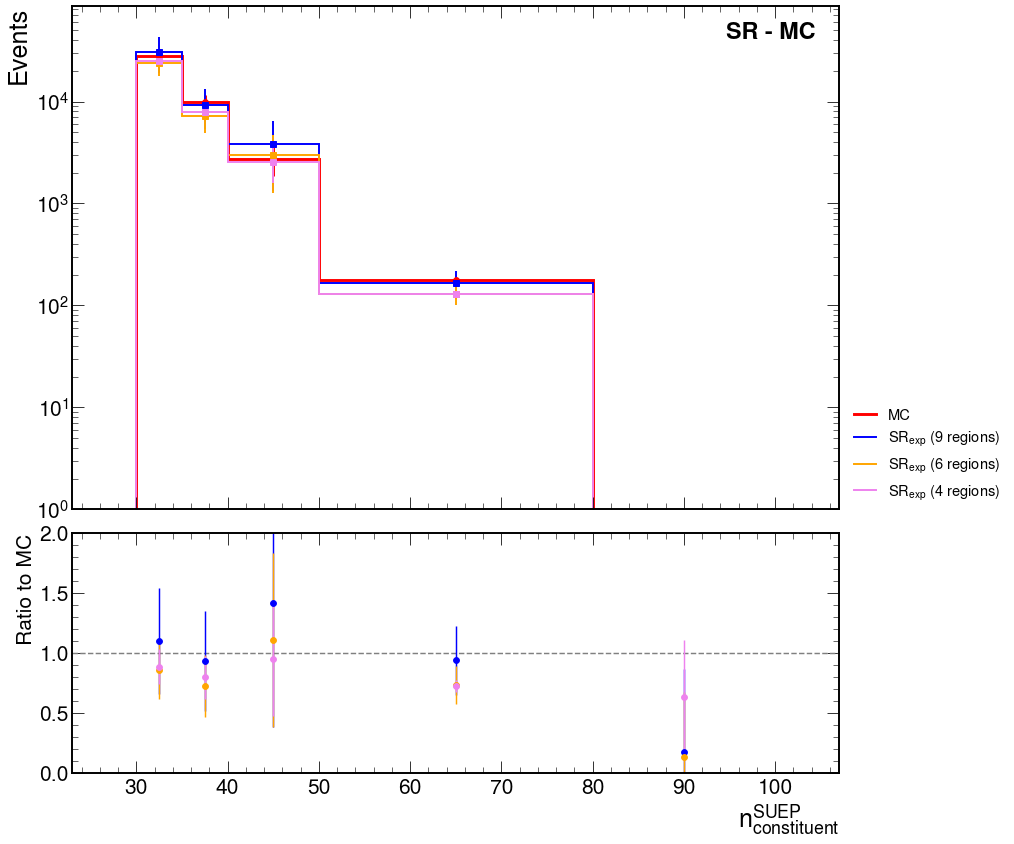

In [70]:
plot_label = "2D_SUEP_S1_vs_SUEP_nconst_SR"

new_bins = [30, 35, 40, 50, 80, 100]
#new_bins = [40, 45, 50, 55, 60]

rebin = False
# xregions9 = [[0.0j, 0.1j], [0.1j, 0.2j], [0.2j, 0.3j]]
# xregions6 = [[0.0j, 0.2j], [0.2j, 0.3j]]
# xregions4 = [[0.0j, 0.2j], [0.2j, 0.3j]]
# xregions9 = [[0.05j, 0.15j], [0.15j, 0.25j], [0.25j, 0.3j]]
# xregions6 = [[0.05j, 0.25j], [0.25j, 0.3j]]
# xregions4 = [[0.05j, 0.25j], [0.25j, 0.3j]]
# yregions9 = [[10j, 20j], [20j, 30j], [30j, 60j]]
# yregions6 = [[10j, 20j], [20j, 30j], [30j, 60j]]
# yregions4 = [[10j, 30j], [30j, 60j]]
xregions9 = [[0.3j, 0.4j], [0.4j, 0.5j], [0.5j, 1.0j]]
xregions6 = [[0.3j, 0.4j], [0.4j, 0.5j], [0.5j, 1.0j]]
#xregions6 = [[0.3j, 0.5j], [0.5j, 1.0j]]
xregions4 = [[0.3j, 0.5j], [0.5j, 1.0j]]
# yregions9 = [[20j, 30j], [30j, 40j], [40j, 60j]]
# yregions6 = [[20j, 30j], [30j, 40j], [40j, 60j]]
# yregions4 = [[20j, 40j], [40j, 60j]]
yregions9 = [[10j, 20j], [20j, 30j], [30j, 100j]]
yregions6 = [[20j, 30j], [30j, 100j]]
#yregions6 = [[20j, 25j], [25j, 30j], [30j, 100j]]
yregions4 = [[20j, 30j], [30j, 100j]]

sample = 'MC'

abcd = plots[sample][plot_label]

SR, SR_exp = ABCD_9regions_errorProp(abcd, xregions9, yregions9, sum_var='x', approx=True, new_bins=new_bins)
_, SR_exp4 = ABCD_4regions_errorProp(abcd, xregions4, yregions4, sum_var='x', new_bins=new_bins)
_, SR_exp6 = ABCD_6regions_errorProp(abcd, xregions6, yregions6, sum_var='x', approx=True, new_bins=new_bins)

fig, axs = plot_ratio(
    [SR, SR_exp, 
     SR_exp6, SR_exp4
     ], labels=["MC", "$SR_{exp}$ (9 regions)", "$SR_{exp}$ (6 regions)", "$SR_{exp}$ (4 regions)"],
    cmap=['red', 'blue', 'orange', 'violet'],
    linewidth=[3, 2, 2, 2],
    linestyle=['-', '-', '-', '-'],
    fmt=['o', 's', 's', 's'],
)
_ = axs[1].set_ylim(0.0, 2.0)
_ = axs[0].set_ylim(1e0)
_ = axs[0].legend(loc=(1.01, 0), fontsize='xx-small')

region = plot_label.split("_")[-1]
axs[0].text(0.97, 0.97, region + " - " + sample, transform=axs[0].transAxes, fontsize=24, fontweight='bold', va='top', ha='right')

In [39]:
def plot_all_regions_from2d(
    _plots,
    abcd_label,
    samples,
    xregions,
    yregions,
    density=False,
    sum_var="x",
    stack=True,
    ax=None,
    labels=[],
):
    if ax is None:
        fig = plt.figure(figsize=(20, 7))
        ax = fig.subplots()

    iter_regions = []
    if sum_var == "x":
        for xbounds in xregions:
            for ybounds in yregions:
                iter_regions.append([xbounds, ybounds])
    elif sum_var == "y":
        for ybounds in yregions:
            for xbounds in xregions:
                iter_regions.append([xbounds, ybounds])
    else:
        raise ValueError("sum_var must be 'x' or 'y'")
    
    print(iter_regions)
    
    offset = 0
    offsets = []
    mids = []
    for i, region in enumerate(iter_regions):
        # get (x, y) for each sample in rhig region
        hists, ys, edges, centers = [], [], [], []
        for sample in samples:
            if sum_var == "x":
                h = _plots[sample][abcd_label][region[0][0]:region[0][1]:sum, region[1][0]:region[1][1]]
            elif sum_var == "y":
                h = _plots[sample][abcd_label][region[0][0]:region[0][1], region[1][0]:region[1][1]:sum]
            if density:
                h = h / h.sum().value
            hists.append(h)
            ys.append(h.values())
            centers.append(h.axes[0].centers)
            edges.append(h.axes[0].edges)

        # get args for min and max
        xmins, xmaxs = [], []
        for y in ys:
            xmin = np.argwhere(y > 0)[0] if any(y > 0) else [1e6]
            xmax = np.argwhere(y > 0)[-1] if any(y > 0) else [1e-6]
            xmins.append(xmin)
            xmaxs.append(xmax)
        xmin = min(xmins)[0]
        xmax = max(xmaxs)[0]

        # get only range that matters
        Xs, Ys = [], []
        for x, y in zip(edges, ys):
            x = x[xmin : xmax + 1]
            y = y[xmin : xmax + 1]
            x = x - x[0]
            this_offset = x[-1] - x[0]
            x = x + offset
            Xs.append(x)
            Ys.append(y)

        # total offset
        offsets.append(this_offset)
        offset += this_offset

        mids.append((Xs[0][-1] + Xs[0][0]) / 2)

        ysum = np.zeros_like(Ys[0])
        for h, x, y, sample in zip(hists, Xs, Ys, samples):
            y_errs = np.sqrt(h.variances())
            y_errs = y_errs[xmin : xmax + 1]
            if i == 0: label = sample
            else: label = None 

            if stack:
                ax.fill_between(x, ysum, ysum+y, color=getColor(sample),label=label, interpolate=False, step='mid')
            else:
                ax.step(x, y, color=getColor(sample), label=label, where="mid")

            ysum += y

        ax.axvline(Xs[0][0], ls="--", color="black")

    if len(labels) == 0:
        _regions = 'ABCDEFGHI'
        labels = [_regions[i] for i in range(len(iter_regions))]
        labels[-1] = 'SR'
    for label in labels:
        ax.text(mids.pop(0), 0.92, label, transform=ax.get_xaxis_transform(), fontsize='small', ha='center', fontweight='bold')

    if not density:
        ax.set_ylabel("Events", y=1, ha="right")
    else:
        ax.set_ylabel("Normalized Events", y=1, ha="right")
    ax.legend(loc="upper left", bbox_to_anchor=(1.02, 1), fontsize='xx-small')

    return ax


In [35]:
plots_vrgj['MC-VRGJ']['SUEP_S1_VRGJhighS']

Hist(Regular(100, 0, 1, name='SUEP_S1_VRGJhighS', label='$S^{\\mathrm{SUEP}}_{\\mathrm{boosted}}$'), storage=Weight()) # Sum: WeightedSum(value=3.79122e+07, variance=1.81488e+11)

[[[0.3j, 0.4j], [10j, 20j]], [[0.3j, 0.4j], [20j, 30j]], [[0.3j, 0.4j], [30j, 100j]], [[0.4j, 0.5j], [10j, 20j]], [[0.4j, 0.5j], [20j, 30j]], [[0.4j, 0.5j], [30j, 100j]], [[0.5j, 1j], [10j, 20j]], [[0.5j, 1j], [20j, 30j]], [[0.5j, 1j], [30j, 100j]]]


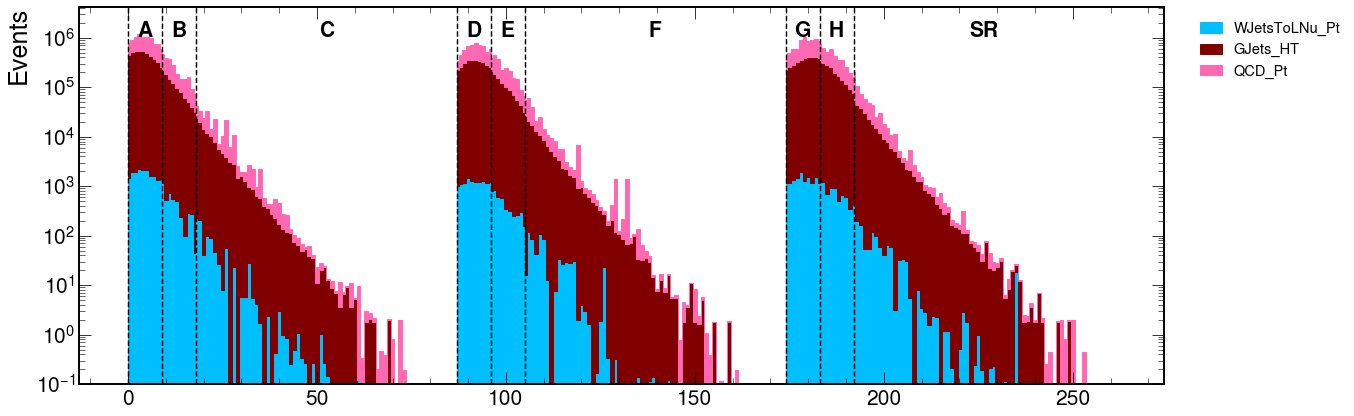

In [41]:
xregions9 = [[0.3j, 0.4j], [0.4j, 0.5j], [0.5j, 1.0j]]
#xregions9 = [[0.05j, 0.15j], [0.15j, 0.25j], [0.25j, 0.3j]]

yregions9 = [[10j, 20j], [20j, 30j], [30j, 100j]]


ax = plot_all_regions_from2d(
    plots_vrgj,
    '2D_SUEP_S1_vs_SUEP_nconst_VRGJhighS',
    samples=bkgs_vrgj,
    xregions=xregions9,
    yregions=yregions9,
    density=False,
    sum_var="x",
    stack=True,
)
ax.set_yscale('log')
_ = ax.set_ylim(1e-1)

## CRTT

In [ ]:
plots['tt']['minDeltaPhiJetLepton_CRTT'][2.2j:].sum().value/plots['tt']['minDeltaPhiJetLepton_CRTT'].sum().value

In [ ]:
plots['SUEP-ttH-M125_mPhi3.0_T0.75_hadronic']['minDeltaPhiJetLepton_CRTT'][2.2j:].sum().value/plots['SUEP-ttH-M125_mPhi3.0_T0.75_hadronic']['minDeltaPhiJetLepton_CRTT'].sum().value

In [ ]:
plots['SUEP-WH-mS125_T0.75_mPhi3.0_hadronic']['minDeltaPhiJetLepton_SR'][2.2j:].sum().value/plots['SUEP-WH-mS125_T0.75_mPhi3.0_hadronic']['minDeltaPhiJetLepton_SR'].sum().value

In [ ]:
plots['WJetsToLNu_Pt']['minDeltaPhiJetLepton_SR'][2.2j:].sum().value/plots['WJetsToLNu_Pt']['minDeltaPhiJetLepton_SR'].sum().value

In [ ]:
1/(1+(0.8/0.125))

In [ ]:
cutflows['tt']

In [ ]:
cutflows['WJetsToLNu_Pt']

In [ ]:
h1 = plots['SUEP-ttH-M125_mPhi3.0_T0.75_hadronic']['SUEP_nconst_CRTT'][::4j]
h2 = plots['SUEP-ttH-M125_mPhi3.0_T0.75_hadronic']['SUEP_nconst_CRTT2'][::4j]

fig, axs = plot_ratio([h1, h2])
axs[1].set_ylim(0.5, 1.5)

In [ ]:
h1 = plots['SUEP-ttH-M125_mPhi3.0_T0.75_hadronic']['SUEP_nconst_CRTT'][::4j]
h2 = plots['SUEP-ttH-M125_mPhi3.0_T0.75_hadronic']['SUEP_nconst_CRTT5'][::4j]

fig, axs = plot_ratio([h1, h2])
axs[1].set_ylim(0.5, 1.5)

In [ ]:
h1 = plots['tt']['SUEP_nconst_CRTT'][::4j]
h2 = plots['tt']['SUEP_nconst_CRTT5'][::4j]

fig, axs = plot_ratio([h1, h2], labels=["tt - CRTT", "tt - CRTT + akjets < 3", density=True)
axs[1].set_ylim(0.5, 1.5)

In [ ]:
h1 = plots['WJetsToLNu_Pt']['SUEP_nconst_SR4']
h2 = plots['WJetsToLNu_Pt']['SUEP_nconst_SR']

fig, axs = plot_ratio([h1, h2])
axs[1].set_ylim(0.5, 1.5)

In [ ]:
plots['tt']['deltaPhi_minDeltaPhiMETJet_SUEP_CRTT'][0.0j:1.0j]

In [ ]:
plots['SUEP-ttH-M125_mPhi3.0_T0.75_hadronic']['deltaPhi_minDeltaPhiMETJet_SUEP_CRTT'][0.0j:1.0j]

In [ ]:
plots['WJetsToLNu_Pt']['deltaPhi_minDeltaPhiMETJet_SUEP_CRTT'][0.0j:1.0j]

In [ ]:
plots['SUEP-WH-mS125_T0.75_mPhi3.0_hadronic']['deltaPhi_minDeltaPhiMETJet_SUEP_CRTT'][0.0j:1.0j]

### Distributions

In [ ]:
plot_labels =[
    'SUEP_nconst_CRTT',
    'SUEP_nconst_CRTT2'
]
samples = [
    'SUEP-ttH-mS125_T0.5_mPhi2.0_generic',
    #'SUEP-ttH-mS125_T0.75_mPhi3.0_generic',
    #'SUEP-ttH-mS125_T1.0_mPhi4.0_generic',
    #'SUEP-ttH-mS125_T1.5_mPhi3.0_generic',
    #'SUEP-ttH-mS125_T12.0_mPhi3.0_generic',
    #'SUEP-ttH-mS125_T16.0_mPhi4.0_generic',
    #'SUEP-ttH-mS125_T16.0_mPhi8.0_generic',
    'SUEP-ttH-mS125_T2.0_mPhi2.0_generic',
    #'SUEP-ttH-mS125_T2.0_mPhi4.0_generic',
    #'SUEP-ttH-mS125_T2.0_mPhi8.0_generic',
    'SUEP-ttH-mS125_T3.0_mPhi3.0_generic',
    #'SUEP-ttH-mS125_T4.0_mPhi2.0_generic',
    'SUEP-ttH-mS125_T4.0_mPhi4.0_generic',
    #'SUEP-ttH-mS125_T6.0_mPhi3.0_generic',
    #'SUEP-ttH-mS125_T8.0_mPhi2.0_generic',
    #'SUEP-ttH-mS125_T8.0_mPhi4.0_generic',
    'SUEP-ttH-mS125_T8.0_mPhi8.0_generic',
]
stacked_samples = bkgs
density = False
yerr = False
new_bins = None #np.linspace(0,300,31)
saveFigs = True

for plot_label in plot_labels:

    fig = plt.figure()
    ax = fig.add_subplot()

    h_samples = []
    h_stacked_samples = []
    for sample in samples:  
        h = plots[sample][plot_label]
        if new_bins is not None: h = rebin_piecewise(h, new_bins)
        h_samples.append(h)
    for sample in stacked_samples:
        h = plots[sample][plot_label]
        if new_bins is not None: h = rebin_piecewise(h, new_bins)
        h_stacked_samples.append(h)
     
    if len(h_stacked_samples) > 0: hep.histplot(h_stacked_samples, yerr=yerr, density=density, label=stacked_samples, stack=True, histtype='fill', ax=ax)
    if len(h_samples) > 0: hep.histplot(h_samples, yerr=yerr, density=density, label=samples, linestyle='dashed', linewidth=3, ax=ax)
        
    # tweak these by hand, as needed
    ax.legend(loc=(1.05,0), fontsize='xx-small')
    ax.set_yscale("log")
    #plt.ylim(1e-4, 1e-1)
    plt.xlim(0, 100)

    region = plot_label.split("_")[-1]
    plt.text(0.97, 0.97, region, transform=plt.gca().transAxes, fontsize=24, fontweight='bold', va='top', ha='right')

    # save and show
    if saveFigs:
        fig.savefig(output_label + plot_label + ".pdf", bbox_inches='tight')
        fig.savefig(output_label + plot_label + ".png", bbox_inches='tight')
    fig.show()

### CRTT vs SR

Compare the shapes of the key variables for the tt background between CRTT and SR.

The shapes should be simliar for the CR to be a reliable estimate of the SR.

In [ ]:
hCRTT = plots['tt']['SUEP_nconst_CRTT1'].copy()
hSR = plots['tt']['SUEP_nconst_SR'].copy()
new_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# hCRTT = rebin_piecewise(hCRTT, new_bins)
# hSR = rebin_piecewise(hSR, new_bins)

hCRTT = hCRTT[15j:]
hSR = hSR[15j:]

fig, axs = plot_ratio([hCRTT, hSR], ['CRTT', 'SR'], density=True)
axs[1].set_ylim(0.5, 5)

In [ ]:
hCRTT = plots['tt']['SUEP_S1_CRTT'].copy()
hSR = plots['tt']['SUEP_S1_SR'].copy()

fig, axs = plot_ratio([hCRTT, hSR], ['CRTT', 'SR'], density=True)
axs[1].set_ylim(0.5, 2.0)

In [ ]:
hCRTT = plots['tt']['ak4jet1_inSUEPcluster_pt_CRTT1'].copy()[::8j]
hSR = plots['tt']['ak4jet1_inSUEPcluster_pt_SR'].copy()[::8j]

fig, axs = plot_ratio([hCRTT, hSR], ['CRTT', 'SR'], density=True)
axs[1].set_ylim(0.5, 2.0)

### Closure

Check ABCD method closure in CRTT

In [ ]:
plot_label = '2D_ak4jet1_inSUEPcluster_pt_vs_SUEP_nconst_CRTT'
new_bins = [30, 40, 50, 60, 70, 80, 100]
rebin = True
xregions = [[230j, 100000j], [130j, 230j], [30j, 130j]]
yregions = [[10j, 20j], [20j, 30j], [30j, 500j]]
sample = 'tt'


abcd = plots[sample][plot_label]

SR, SR_exp = ABCD_9regions_errorProp(abcd, xregions, yregions, sum_var='x', approx=False, new_bins=new_bins)

fig, axs = plot_ratio([SR_exp, SR], labels=["$CRTT_{exp}$", "$CRTT_{obs}$"])
_ = axs[1].set_ylim(0.0, 2.0)
_ = axs[0].set_ylim(1e0, 2e4)
_ = axs[0].set_xlim(30, 70)
axs[0].legend(fontsize='xx-small')

In [ ]:
plot_label = '2D_jet1_pT_vs_SUEP_nconst_CRTT'
new_bins = [30, 40, 50, 60, 70, 80, 100]
rebin = True
xregions = [[330j, 10000j], [130j, 230j], [30j, 130j]]
yregions = [[10j, 20j], [20j, 30j], [30j, 500j]]
sample = 'MC'


abcd = plots[sample][plot_label]

SR, SR_exp = ABCD_9regions_errorProp(abcd, xregions, yregions, sum_var='x', approx=False, new_bins=new_bins)

fig, axs = plot_ratio([SR_exp, SR], labels=["$CRTT_{exp}$", "$CRTT_{obs}$"])
_ = axs[1].set_ylim(0.0, 10.0)
axs[0].legend(fontsize='xx-small')

### Cutflows

In [ ]:
cutflows['tt']

In [ ]:
samples= [
    'SUEP-ttH-M125_mPhi3.0_T0.75_hadronic'
] + ['tt']
selections = [
    'total', 
    'genCuts', 'allTriggers',  'qualityFilters', 'orthogonality', 'oneLepton', 'oneCluster', 'twoTracksInCluster',
    'MET_pt_>_30.0_CRTT',
    'W_pt_from_MET_>_40.0_CRTT',
    "W_mT_from_MET_<_130.0_SR", "W_mT_from_MET_>_30.0_CRTT",
    'bjetSel_==_0.0_CRTT',
    'deltaPhi_SUEP_W_>_1.5_CRTT', 'deltaPhi_SUEP_MET_>_1.5_CRTT', 'deltaPhi_lepton_SUEP_>_1.5_CRTT',
    'ngood_ak4jets_>=_1.0_CRTT',
    'deltaPhi_minDeltaPhiMETJet_MET_>_0.4_CRTT',
    'W_SUEP_BV_<_2.0_CRTT',
    'deltaPhi_minDeltaPhiMETJet_MET_>_1.5_CRTT',
]
selection_labels = [
    'Total',
    'Gen cuts', 'Triggers', 'Quality filters', 'ZH & ggF orthogonality', 'One tight lepton', 'One AK15 cluster', 'Two tracks in AK15 cluster',
    'MET pT > 30 GeV',
    'W pT > 40 GeV',
    "W mT < 130 GeV", "W mT > 30 GeV",
    '1 tight b-tagged jet OR >=2 loose b-tagged jets',
    'deltaPhi(SUEP, W) > 1.5', 'deltaPhi(SUEP, MET) > 1.5', 'deltaPhi(lepton, SUEP) > 1.5',
    '> 0 AK4 jets',
    'deltaPhi(minDeltaPhiMETJet, MET) > 0.4',
    'BV(W, SUEP) < 2.0',
    'deltaPhi(minDeltaPhiMETJet, MET) > 2.0',
]

table = cutflow_table(cutflows, samples, selections, selection_labels, sig_figs=5)
print("Yields")
print(table)

table = cutflow_table(cutflows, samples, selections, selection_labels, efficiencies=True, sig_figs=3)
print("Efficiencies")
print(table)

table = cutflow_table(cutflows, samples, selections, selection_labels, relative_efficiencies=True, sig_figs=2)
print("Relative efficiencies")
print(table)

fig, ax = cutflow_plot(cutflows, samples, selections, selection_labels)
fig.show()

### N-1 Plots

In [ ]:
stackedSamples = ['tt']
samples = [
    'SUEP-ttH-M125_mPhi3.0_T0.75_hadronic'
]

figs = make_n1_plots(plots, cutflows, "CRTT", samples=samples, stackedSamples=stackedSamples, density=False)


### ttH & WH Contamination

Find the samples with highest yields in CRTT in high # constituents region.

In [5]:
def get_limit(limitFile):
    f = uproot.open(limitFile)
    return f['limit']['limit'].array()[0]

def get_ggf_limit(ms, t, mphi, decay):
    limitsDir = '/home/submit/lavezzo/SUEP/CMSSW_10_2_13/src/SUEPLimits/approval_higherPrecision/'
    modifiedTemp = t.replace(".", "p")
    while len(modifiedTemp) < 4:
        modifiedTemp += "0"
    limitFile = limitsDir + 'higgsCombineGluGluToSUEP_HT1000_T{}_mS{:.3f}_mPhi{:.3f}_T{:.3f}_mode{}_TuneCP5_13TeV-pythia8.HybridNew.mH125.root'.format(modifiedTemp, float(ms), float(mphi), float(t), decay)
    limit = get_limit(limitFile)
    return limit

def get_ggf_scouting_limit(ms, t, mphi, decay):
    limitsDir = '/work/submit/jinw65/CMSSW_10_2_13/src/SUEPLimits/cards_highmass_blind/'
    modifiedTemp = t.replace(".", "p")
    while len(modifiedTemp) < 4:
        modifiedTemp += "0"
    limitFile = limitsDir + 'higgsCombineGluGluToSUEP_HT400_T{}_mS{:.3f}_mPhi{:.3f}_T{:.3f}_mode{}_TuneCP5_13TeV-pythia8.AsymptoticLimits.mH125.root'.format(modifiedTemp, float(ms), float(mphi), float(t), decay)
    try:
        limit = get_limit(limitFile)
    except:
        limit = 1
    return limit

def get_tth_limit(ms, t, mphi, decay):
    limitsDir = '/home/submit/lavezzo/SUEP/CMSSW_10_2_13/src/SUEPLimits/limits_ttH_v8/'
    limitFile = limitsDir + "higgsCombinettHpythia_{mode}_M{mS:.1f}_MD{mPhi:.2f}_T{T:.2f}_HT-1.AsymptoticLimits.mH125.root".format(mS=float(ms), mPhi=float(mphi), T=float(t), mode=decay)
    limit = get_limit(limitFile)
    return limit

def get_parameters_from_ttH(sample):
    ms = sample.split('-')[2].split('_')[0].replace('M', '').replace("mS", "")
    mphi = sample.split('_')[2].replace('mPhi', '')
    t = sample.split('_')[1].replace('T', '')
    decay = sample.split('_')[3]
    return ms, mphi, t, decay

def get_ggf_limit_from_ttH(sample): 
    ms, mphi, t, decay = get_parameters_from_ttH(sample)
    return min(get_ggf_limit(ms, t, mphi, decay), get_ggf_scouting_limit(ms, t, mphi, decay), 1)

def get_tth_limit_from_ttH(sample):
    ms, mphi, t, decay = get_parameters_from_ttH(sample)
    print(sample, min(get_tth_limit(ms, t, mphi, decay), 1))
    return min(get_tth_limit(ms, t, mphi, decay), 1)

In [ ]:
apply_ggf_limits = False
apply_tth_limits = True
showTopN = 100
checkAboveNconstituents = 40

signal_samples = np.array([s for s in plots.keys() if s.startswith('SUEP-ttH') and 'generic' in s])
# signal_samples += np.array([s for s in plots.keys() if s.startswith('WHleptonicpythia')])

# integrate SUEP nconst > 30 to f
signal_yields = []
for signal_sample in signal_samples:
    nevents = plots[signal_sample]['2D_ak4jet1_inSUEPcluster_pt_vs_SUEP_nconst_CRTT'][30j:130j:sum,:][checkAboveNconstituents*1.0j:].sum().value
    if apply_ggf_limits: nevents *= get_ggf_limit_from_ttH(signal_sample)
    if apply_tth_limits: nevents *= get_tth_limit_from_ttH(signal_sample)
    signal_yields.append(nevents)

# highest 5 contaminants
signal_yields = np.array(signal_yields)
highest_signal_yields = signal_yields[np.argsort(signal_yields)[::-1]][:showTopN]
highest_signal_samples = signal_samples[np.argsort(signal_yields)[::-1]][:showTopN]

nbkg = plots['MC']['2D_ak4jet1_inSUEPcluster_pt_vs_SUEP_nconst_CRTT'][30j:130j:sum,:][checkAboveNconstituents*1.0j:].sum().value 
for yield_, sample in zip(highest_signal_yields, highest_signal_samples):
    print(f"{sample}:")
    print(f"  {yield_ / nbkg:.2%} of total")

# make a plot of the highest 5 contaminants
hlist, samples = [], []
new_bins = [0, 10, 20, 30, 40, 50, 70, 100]
hBkg = plots['MC']['2D_ak4jet1_inSUEPcluster_pt_vs_SUEP_nconst_CRTT'][30j:130j:sum,:].copy()
hBkg = rebin_piecewise(hBkg, new_bins)
hlist.append(hBkg)
samples.append('MC')
for yield_, sample in zip(highest_signal_yields, highest_signal_samples):
    hSignal = plots[sample]['2D_ak4jet1_inSUEPcluster_pt_vs_SUEP_nconst_CRTT'][30j:130j:sum,:].copy()
    if apply_ggf_limits: hSignal *= get_ggf_limit_from_ttH(sample)
    if apply_tth_limits: hSignal *= get_tth_limit_from_ttH(sample)
    hSignal = rebin_piecewise(hSignal, new_bins)
    hlist.append(hSignal)
    samples.append(sample)

fig, axs = plot_ratio(hlist, samples)
hep.histplot(hlist[0], histtype='fill', color='#00002a', ax=axs[0], alpha=0.5)
axs[0].legend(loc=(1.01, 0), fontsize=15)
axs[1].set_ylim(0, 2)
axs[0].set_ylim(1e0, 1e6)
axs[0].set_xlim(0, 100)

## CRWJ

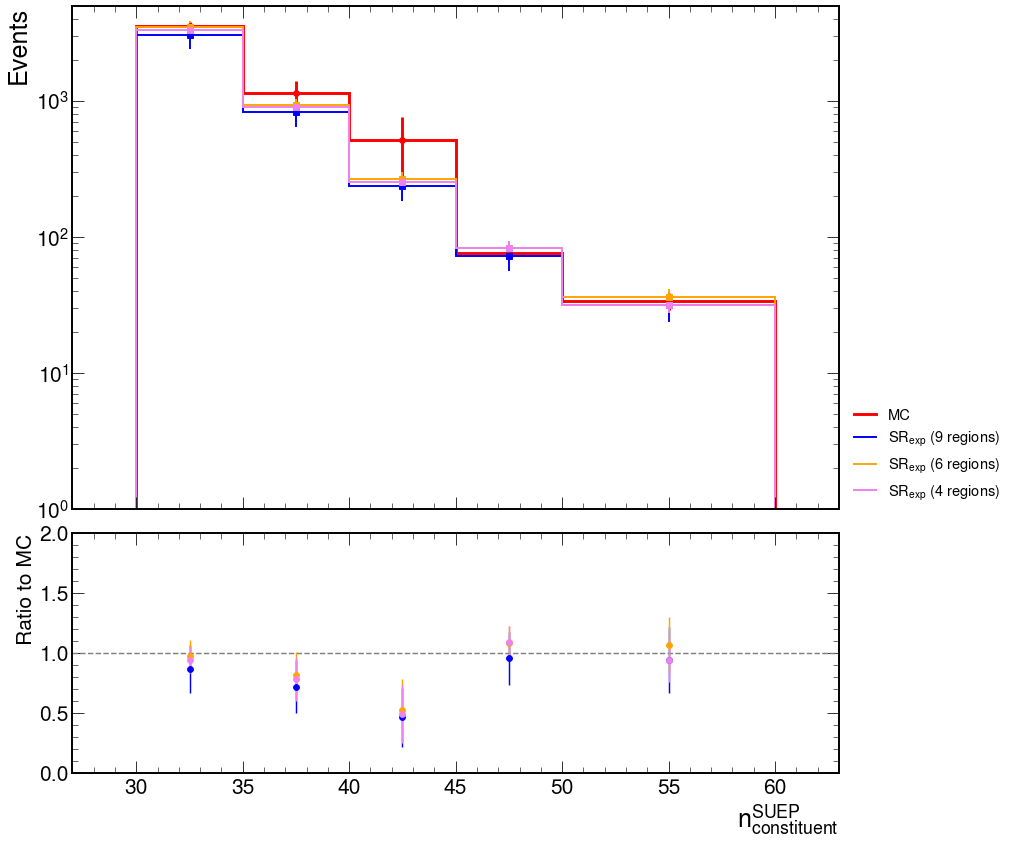

In [44]:
plot_label = "2D_SUEP_S1_vs_SUEP_nconst_CRWJ50"

new_bins = [30, 35, 40, 45, 50, 60]
#new_bins = [40, 45, 50, 55, 60]

rebin = False
# xregions9 = [[0.0j, 0.1j], [0.1j, 0.2j], [0.2j, 0.3j]]
# xregions6 = [[0.0j, 0.2j], [0.2j, 0.3j]]
# xregions4 = [[0.0j, 0.2j], [0.2j, 0.3j]]
# xregions9 = [[0.05j, 0.15j], [0.15j, 0.25j], [0.25j, 0.3j]]
# xregions6 = [[0.05j, 0.25j], [0.25j, 0.3j]]
# xregions4 = [[0.05j, 0.25j], [0.25j, 0.3j]]
# yregions9 = [[10j, 20j], [20j, 30j], [30j, 60j]]
# yregions6 = [[10j, 20j], [20j, 30j], [30j, 60j]]
# yregions4 = [[10j, 30j], [30j, 60j]]
xregions9 = [[0.05j, 0.15j], [0.15j, 0.25j], [0.25j, 0.3j]]
xregions6 = [[0.05j, 0.25j], [0.15j, 0.25j], [0.25j, 0.3j]]
xregions4 = [[0.05j, 0.25j], [0.25j, 0.3j]]
# yregions9 = [[20j, 30j], [30j, 40j], [40j, 60j]]
# yregions6 = [[20j, 30j], [30j, 40j], [40j, 60j]]
# yregions4 = [[20j, 40j], [40j, 60j]]
yregions9 = [[10j, 20j], [20j, 30j], [30j, 60j]]
yregions6 = [[20j, 30j], [30j, 60j]]
yregions4 = [[20j, 30j], [30j, 60j]]

sample = 'MC'

abcd = plots[sample][plot_label]

SR, SR_exp = ABCD_9regions_errorProp(abcd, xregions9, yregions9, sum_var='x', approx=True, new_bins=new_bins)
_, SR_exp4 = ABCD_4regions_errorProp(abcd, xregions4, yregions4, sum_var='x', new_bins=new_bins)
_, SR_exp6 = ABCD_6regions_errorProp(abcd, xregions6, yregions6, sum_var='x', approx=True, new_bins=new_bins)

fig, axs = plot_ratio(
    [SR, SR_exp, 
     SR_exp6, SR_exp4
     ], labels=["MC", "$SR_{exp}$ (9 regions)", "$SR_{exp}$ (6 regions)", "$SR_{exp}$ (4 regions)"],
    cmap=['red', 'blue', 'orange', 'violet'],
    linewidth=[3, 2, 2, 2],
    linestyle=['-', '-', '-', '-'],
    fmt=['o', 's', 's', 's'],
)
_ = axs[1].set_ylim(0.0, 2.0)
_ = axs[0].set_ylim(1e0)
_ = axs[0].legend(loc=(1.01, 0), fontsize='xx-small')

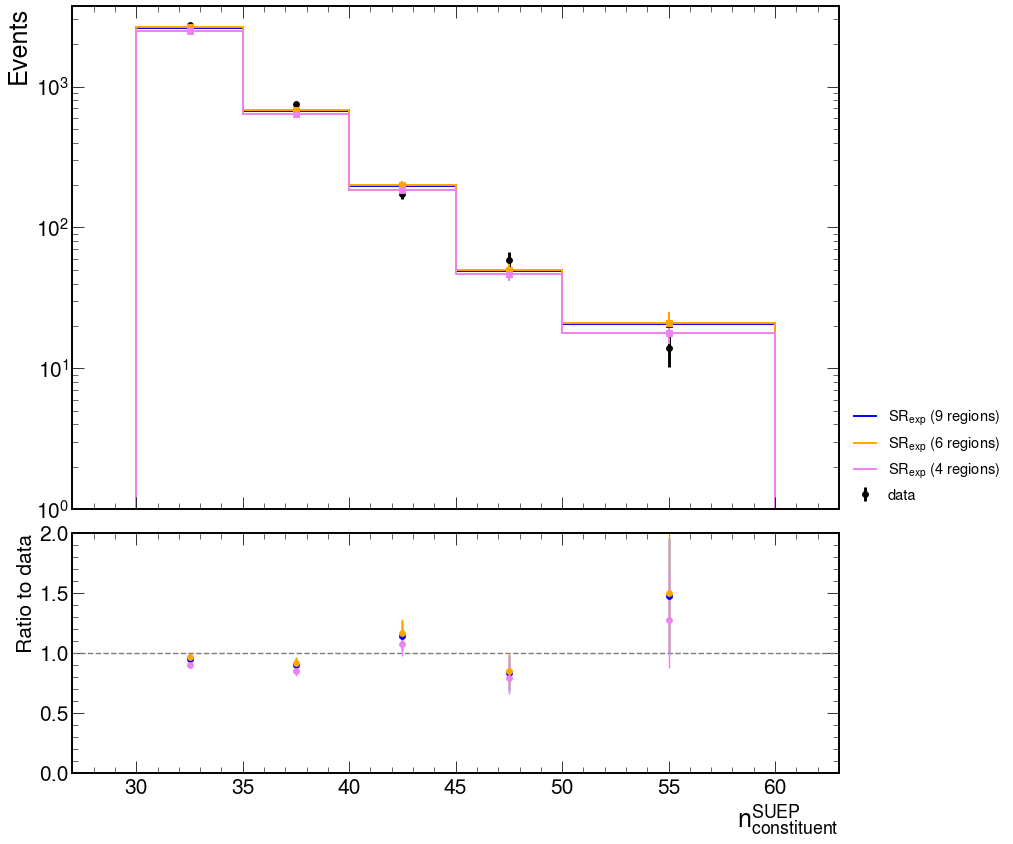

In [11]:
plot_label = "2D_SUEP_S1_vs_SUEP_nconst_CRWJ"

new_bins = [30, 35, 40, 45, 50, 60]
#new_bins = [40, 45, 50, 55, 60]

rebin = False
# xregions9 = [[0.0j, 0.1j], [0.1j, 0.2j], [0.2j, 0.3j]]
# xregions6 = [[0.0j, 0.2j], [0.2j, 0.3j]]
# xregions4 = [[0.0j, 0.2j], [0.2j, 0.3j]]
# xregions9 = [[0.05j, 0.15j], [0.15j, 0.25j], [0.25j, 0.3j]]
# xregions6 = [[0.05j, 0.25j], [0.25j, 0.3j]]
# xregions4 = [[0.05j, 0.25j], [0.25j, 0.3j]]
# yregions9 = [[10j, 20j], [20j, 30j], [30j, 60j]]
# yregions6 = [[10j, 20j], [20j, 30j], [30j, 60j]]
# yregions4 = [[10j, 30j], [30j, 60j]]
xregions9 = [[0.05j, 0.15j], [0.15j, 0.25j], [0.25j, 0.3j]]
xregions6 = [[0.05j, 0.25j], [0.15j, 0.25j], [0.25j, 0.3j]]
xregions4 = [[0.05j, 0.25j], [0.25j, 0.3j]]
# yregions9 = [[20j, 30j], [30j, 40j], [40j, 60j]]
# yregions6 = [[20j, 30j], [30j, 40j], [40j, 60j]]
# yregions4 = [[20j, 40j], [40j, 60j]]
yregions9 = [[10j, 20j], [20j, 30j], [30j, 60j]]
yregions6 = [[20j, 30j], [30j, 60j]]
yregions4 = [[20j, 30j], [30j, 60j]]

sample = 'data'

abcd = plots[sample][plot_label]

SR, SR_exp = ABCD_9regions_errorProp(abcd, xregions9, yregions9, sum_var='x', approx=True, new_bins=new_bins)
_, SR_exp4 = ABCD_4regions_errorProp(abcd, xregions4, yregions4, sum_var='x', new_bins=new_bins)
_, SR_exp6 = ABCD_6regions_errorProp(abcd, xregions6, yregions6, sum_var='x', approx=True, new_bins=new_bins)

fig, axs = plot_ratio(
    [SR, SR_exp, 
     SR_exp6, SR_exp4
     ], labels=["data", "$SR_{exp}$ (9 regions)", "$SR_{exp}$ (6 regions)", "$SR_{exp}$ (4 regions)"],
    cmap=['black', 'blue', 'orange', 'violet'],
    linewidth=[3, 2, 2, 2],
    linestyle=['', '-', '-', '-'],
    fmt=['o', 's', 's', 's'],
)
_ = axs[1].set_ylim(0.0, 2.0)
_ = axs[0].set_ylim(1e0)
_ = axs[0].legend(loc=(1.01, 0), fontsize='xx-small')

In [7]:
plot_label = "2D_SUEP_S1_vs_SUEP_nconst_CRWJ"

new_bins = [30, 35, 40, 45, 50]

rebin = True
xregions9 = [[0.05j, 0.15j], [0.15j, 0.25j], [0.25j, 0.3j]]
xregions6 = [[0.05j, 0.25j], [0.25j, 0.3j]]
xregions4 = [[0.05j, 0.25j], [0.25j, 0.3j]]
# yregions9 = [[20j, 30j], [30j, 40j], [40j, 50j]]
# yregions6 = [[20j, 30j], [30j, 40j], [40j, 50j]]
# yregions4 = [[20j, 40j], [40j, 50j]]
yregions9 = [[10j, 20j], [20j, 30j], [30j, 50j]]
yregions6 = [[10j, 20j], [20j, 30j], [30j, 50j]]
yregions4 = [[10j, 30j], [30j, 50j]]

sample = 'data'

abcd = plots[sample][plot_label][:0.3j, :50j]

SR, SR_exp = ABCD_9regions_errorProp(abcd, xregions9, yregions9, sum_var='x', approx=False, new_bins=new_bins)
_, SR_exp4 = ABCD_4regions_errorProp(abcd, xregions4, yregions4, sum_var='x', new_bins=new_bins)
_, SR_exp6 = ABCD_6regions_errorProp(abcd, xregions6, yregions6, sum_var='x', new_bins=new_bins)

SR_MC = plots['MC'][plot_label][0.25j:0.3j:sum, 30j:50j]
SR_MC = rebin_piecewise(SR_MC, new_bins)

fig, axs = plot_ratio(
    [SR, SR_MC, SR_exp, SR_exp6, SR_exp4], labels=["data", "MC", "$SR_{exp}$ (9 regions)", "$SR_{exp}$ (6 regions)", "$SR_{exp}$ (4 regions)"],
    cmap=['black', 'red', 'blue', 'orange', 'violet'],
    linewidth=[3, 3, 2, 2, 2],
    linestyle=['', '-', '-', '-', '-'],
    fmt=['o', 'o', 's', 's', 's'],
)
_ = axs[1].set_ylim(0.0, 2.0)
_ = axs[0].set_ylim(1e0)
_ = axs[0].legend(loc=(1.01, 0), fontsize='xx-small')

KeyError: 'data'

## VRGJ

### Cutflow

In [117]:
samples= ['MC-VRGJ', 'GJets_HT', 'WJetsToLNu_Pt', 'QCD_Pt'] 

selections = [
    'total', 'goldenJSON', 'genCuts',
    'qualityFilters', 'orthogonality', 'onePhoton', 'allTriggers', 'oneAK4jet', 'oneCluster', 'twoTracksInCluster',
    'WH_gammaTriggerBits_>_0.0_VRGJlowS',
    'photon_pt_>_55.0_VRGJlowS',
    'bjetSel_==_1.0_VRGJlowS',
    'deltaPhi_SUEP_photon_>_1.5_VRGJlowS',
    'cutflow_ak4jets_inSUEPcluster_n_HighestPT_>=_1.0_VRGJlowS',
    'photon_SUEP_BV_<_2.0_VRGJlowS',
]
selection_labels = [
    'Total','goldenJSON','Gen cuts',
    'Quality filters', 'ZH & ggF orthogonality', 'One tight photon', 'Triggers', 'One AK4 jet', 'One AK15 cluster', 'Two tracks in AK15 cluster',
    'gammaTriggerSel',
    'Gamma pT > 55 GeV',
    '0 tight b-tagged jet & < 2 loose b-tagged jets',
    'deltaPhi(SUEP, Gamma) > 1.5', 
    '> 0 AK4 jets inside SUEP cluster',
    'BV(Gamma, SUEP) < 2.0',
]

table = cutflow_table(plots_vrgj, samples, selections, selection_labels, sig_figs=5)
print("Yields")
print(table)

table = cutflow_table(plots_vrgj, samples, selections, selection_labels, efficiencies=True, sig_figs=3)
print("Efficiencies")
print(table)

table = cutflow_table(plots_vrgj, samples, selections, selection_labels, relative_efficiencies=True, sig_figs=3)
print("Relative efficiencies")
print(table)

fig, ax = cutflow_plot(plots_vrgj, samples, selections, selection_labels)
fig.show()

KeyError: 'cutflow_WH_gammaTriggerBits_>_0.0_VRGJlowS'

### Distributions

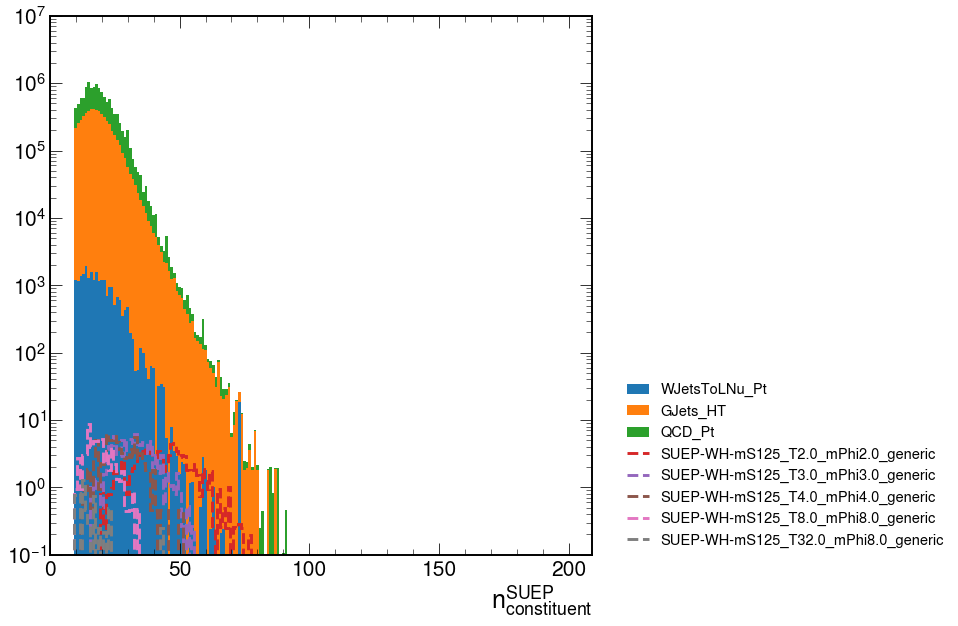

In [125]:
plot_labels = [
    '2D_SUEP_S1_vs_SUEP_nconst_VRGJhighS',
    #'photon_pixelSeed_VRGJlowS',
    #'photon_r9_VRGJlowS',
    #'photon_isScEtaEB_VRGJlowS',
    #'photon_isScEtaEE_VRGJlowS',
    # 'minDeltaRJetPhoton_VRGJlowS',
    # 'maxDeltaRJetPhoton_VRGJlowS',
    # 'minDeltaPhiJetPhoton_VRGJlowS',
    # 'maxDeltaPhiJetPhoton_VRGJlowS',
    #'ngood_ak4jets_VRGJlowS',
    #'photon_eta_VRGJlowS',
    # 'photon_pt_VRGJlowS',
    # 'photon_hoe_VRGJlowS',
    # 'photon_mvaID_VRGJlowS',
    #'photon_pfRelIso03_all_VRGJlowS',
    #'photon_r9_VRGJlowS',
    # 'photon_cutBased_VRGJlowS',
]

samples =  [
    'SUEP-WH-mS125_T2.0_mPhi2.0_generic', 'SUEP-WH-mS125_T3.0_mPhi3.0_generic', 'SUEP-WH-mS125_T4.0_mPhi4.0_generic', 'SUEP-WH-mS125_T8.0_mPhi8.0_generic', 'SUEP-WH-mS125_T32.0_mPhi8.0_generic'
]
stacked_samples = bkgs_vrgj
new_bins = None
density = False
yerr = False
saveFigs = False

for plot_label in plot_labels:

    fig = plt.figure()
    ax = fig.add_subplot()

    h_samples = []
    h_stacked = []
    for sample in samples: 
        h = plots_vrgj[sample][plot_label][0.5j::sum, 10j:]
        if new_bins is not None: h = rebin_piecewise(h, new_bins)
        h_samples.append(h)

    for sample in stacked_samples:
        h = plots_vrgj[sample][plot_label][0.5j::sum, 10j:]
        if new_bins is not None: h = rebin_piecewise(h, new_bins)
        h_stacked.append(h)
     
    if len(h_stacked) > 0: hep.histplot(h_stacked, yerr=yerr, density=density, label=stacked_samples, stack=True, histtype='fill', ax=ax)
    if len(h_samples) > 0: hep.histplot(h_samples, yerr=yerr, density=density, label=samples, linestyle='dashed', linewidth=3, ax=ax)
        
    ax.legend(loc=(1.05,0), fontsize='xx-small')
    ax.set_yscale("log")
    plt.ylim(1e-1, 1e7)
    #plt.xlim(0, 1)

    #ax.axvline(150, c='black')

    region = plot_label.split("_")[-1]
    #plt.text(0.97, 0.97, region, transform=plt.gca().transAxes, fontsize=24, fontweight='bold', va='top', ha='right')

    # save and show
    if saveFigs:
        fig.savefig(output_label + plot_label + ".pdf", bbox_inches='tight')
        fig.savefig(output_label + plot_label + ".png", bbox_inches='tight')
    plt.show()


### Comparison to W+Jets in SR

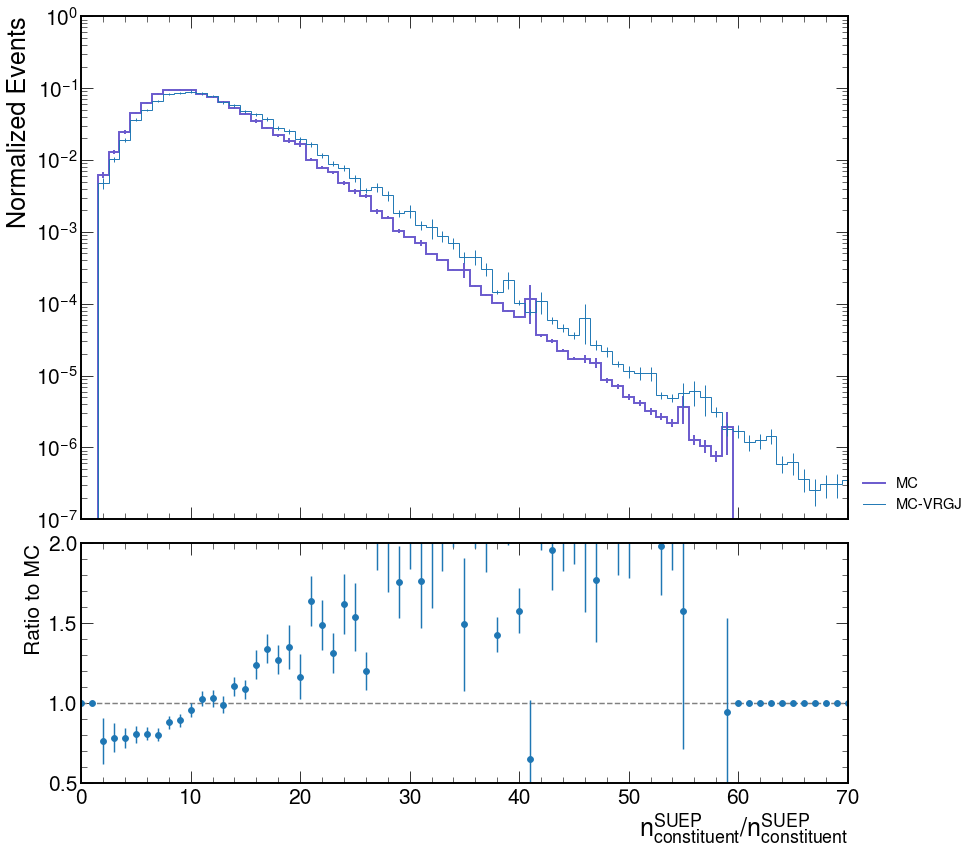

In [105]:
plot_labels = [
    #['lepton_pt_CRWJ', 'photon_pt_VRGJlowS'],
    #['W_pt_CRWJ', 'photon_pt_VRGJlowS'],
    #['deltaPhi_SUEP_W_CRWJ', 'deltaPhi_SUEP_photon_VRGJlowS'],
    #['W_SUEP_BV_CRWJ', 'photon_SUEP_BV_VRGJlowS'],
    #['SUEP_S1_CRWJ', 'SUEP_S1_VRGJlowS'],
    ['SUEP_nconst_CRWJ', 'SUEP_nconst_VRGJlowS'],
    #['SUEP_nconst_CRWJ', 'SUEP_nconst_VRGJlowSORTH'],
    #['SUEP_S1_CRWJ', 'SUEP_S1_VRGJlowS'],
    #['SUEP_S1_CRWJ', 'SUEP_S1_VRGJlowSORTH'],
    #['SUEP_pt_CRWJ50', 'SUEP_pt_VRGJlowS'],
    #['ngood_ak4jets_CRWJ', 'ngood_ak4jets_VRGJlowS'],
    #['jet1_pt_CRWJ', 'jet1_pt_VRGJlowS'],
    #['ak4jets_inSUEPcluster_n_CRWJ', 'ak4jets_inSUEPcluster_n_VRGJlowS'],
    #['2D_SUEP_S1_vs_SUEP_nconst_CRWJ', '2D_SUEP_S1_vs_SUEP_nconst_VRGJlowS'],
    #['2D_SUEP_S1_vs_SUEP_nconst_CRWJ50', '2D_SUEP_S1_vs_SUEP_nconst_VRGJ'],
]    
samples = ['MC', 'MC-VRGJ']

for pair in plot_labels:

    hwjets = plots[samples[0]][pair[0]].copy()
    hgjets = plots_vrgj[samples[1]][pair[1]].copy()

    if len(hwjets.axes[0]) != len(hgjets.axes[0]):
        ub = min(hwjets.axes[0].edges[-1], hgjets.axes[0].edges[-1]) * 1.0j
        hwjets = hwjets[:ub]
        hgjets = hgjets[:ub]
        lb = max(hwjets.axes[0].edges[0], hgjets.axes[0].edges[0]) * 1.0j
        hwjets = hwjets[lb:]
        hgjets = hgjets[lb:]

        if len(hwjets.axes[0]) < len(hgjets.axes[0]):
            hgjets = rebin_piecewise(hgjets, hwjets.axes[0].edges)
        elif len(hwjets.axes[0]) > len(hgjets.axes[0]):
            hwjets = rebin_piecewise(hwjets, hgjets.axes[0].edges)

    fig, axs = styled_plot_ratio([hwjets, hgjets], labels=samples, density=True)
    xlabel = hwjets.axes[0].label.split("[")[0] + "/" + hgjets.axes[0].label
    axs[1].set_xlabel(xlabel)
    axs[1].set_ylim(0.5, 2.0)
    axs[0].set_xlim(0, 70)
    axs[0].set_ylim(1e-7, 1e0)
    fig.show()


### Closure - Low Sphericity

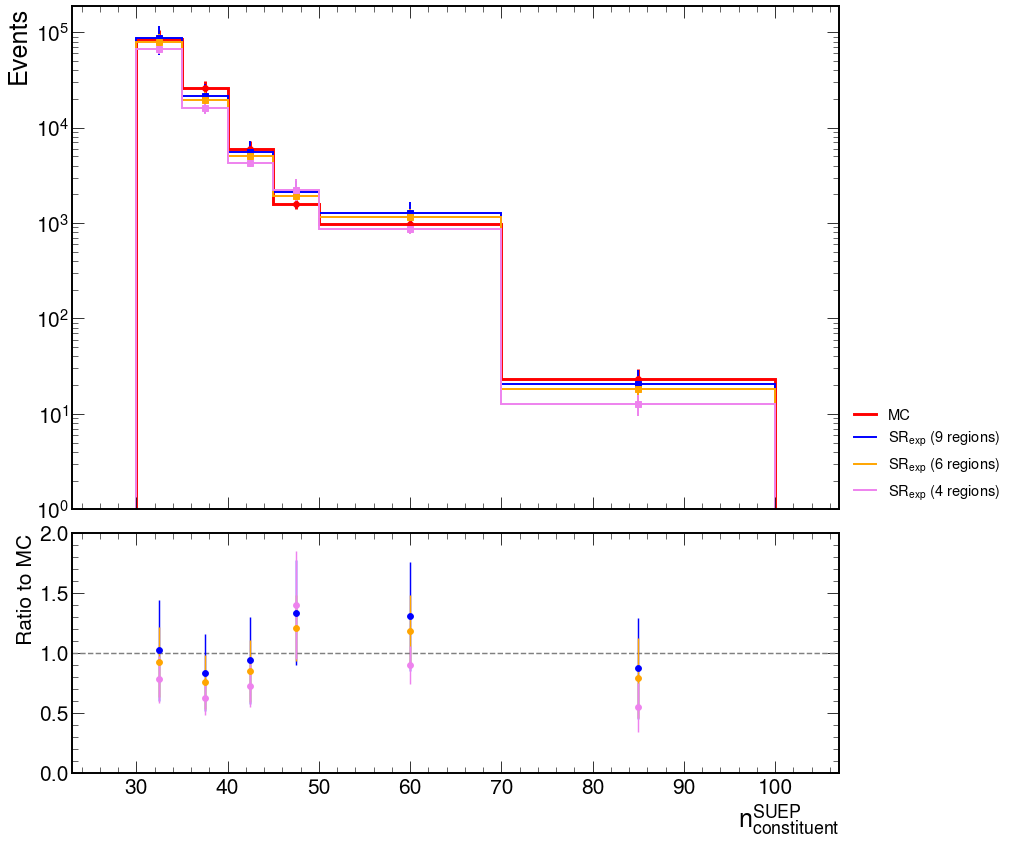

In [13]:
plot_label = "2D_SUEP_S1_vs_SUEP_nconst_VRGJlowS"

new_bins = [30, 35, 40, 45, 50, 70, 100]
#new_bins = [ 40, 45, 50, 60, 70, 100]

rebin = True
# xregions9 = [[0.05j, 0.15j], [0.15j, 0.25j], [0.25j, 0.3j]]
# xregions6 = [[0.05j, 0.25j], [0.25j, 0.3j]]
# xregions4 = [[0.05j, 0.25j], [0.25j, 0.3j]]

# yregions9 = [[20j, 30j], [30j, 40j], [40j, 100j]]
# yregions6 = [[20j, 30j], [30j, 40j], [40j, 100j]]
# yregions4 = [[20j, 40j], [40j, 100j]]

# yregions9 = [[10j, 20j], [20j, 30j], [30j, 100j]]
# yregions6 = [[10j, 20j], [20j, 30j], [30j, 100j]]
# yregions4 = [[20j, 30j], [30j, 100j]]

xregions9 = [[0.05j, 0.15j], [0.15j, 0.25j], [0.25j, 0.3j]]
xregions6 = [[0.05j, 0.15j], [0.15j, 0.25j], [0.25j, 0.3j]]
xregions4 = [[0.05j, 0.25j], [0.25j, 0.3j]]
yregions9 = [[10j, 20j], [20j, 30j], [30j, 100j]]
yregions6 = [[20j, 30j], [30j, 100j]]
yregions4 = [[20j, 30j], [30j, 100j]]



sample = 'MC-VRGJ'

abcd = plots_vrgj[sample][plot_label][0.05j:0.3j, :100j]

SR, SR_exp = ABCD_9regions_errorProp(abcd, xregions9, yregions9, sum_var='x', approx=True, new_bins=new_bins)
_, SR_exp4 = ABCD_4regions_errorProp(abcd, xregions4, yregions4, sum_var='x', new_bins=new_bins)
_, SR_exp6 = ABCD_6regions_errorProp(abcd, xregions6, yregions6, sum_var='x', approx=True, new_bins=new_bins)

fig, axs = plot_ratio(
    [SR, SR_exp, SR_exp6, SR_exp4],
    labels=["MC", "$SR_{exp}$ (9 regions)", "$SR_{exp}$ (6 regions)", "$SR_{exp}$ (4 regions)"],
    cmap=['red', 'blue', 'orange', 'violet'],
    linewidth=[3, 2, 2, 2],
    linestyle=['-', '-', '-', '-'],
    fmt=['o', 's', 's', 's'],
)
_ = axs[1].set_ylim(0.0, 2.0)
_ = axs[0].set_ylim(1e0)
_ = axs[0].legend(loc=(1.01, 0), fontsize='xx-small')

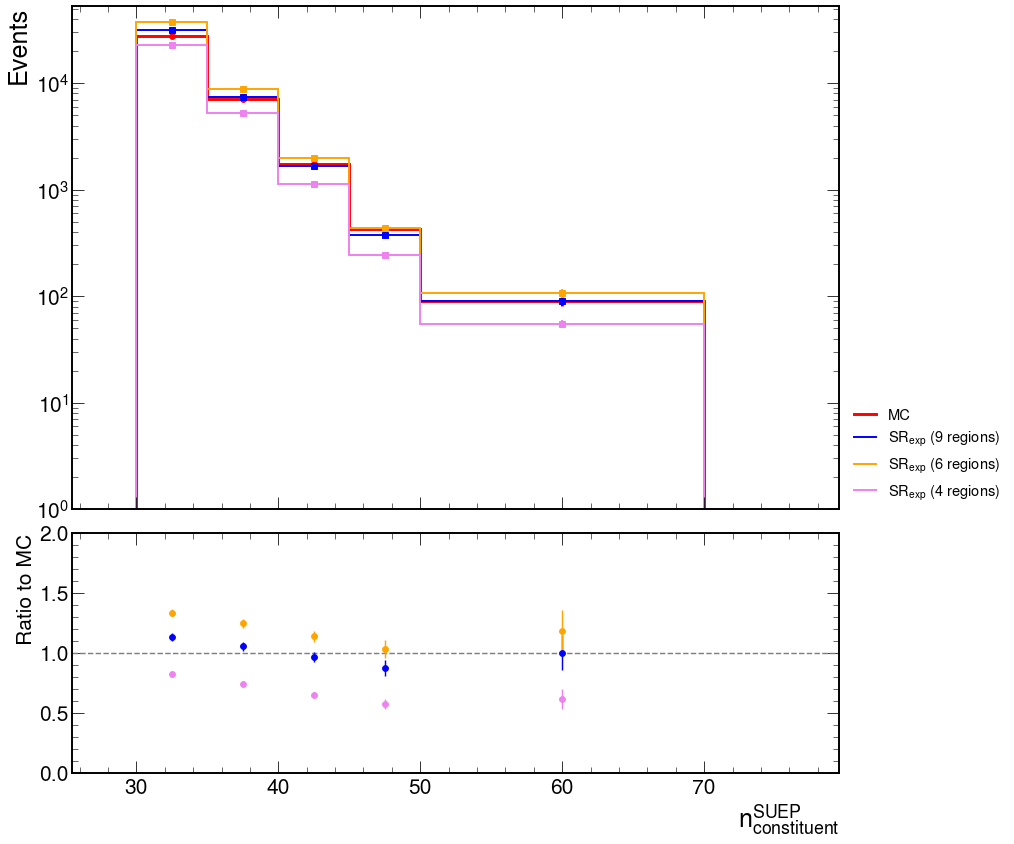

In [178]:
plot_label = "2D_SUEP_S1_vs_SUEP_nconst_VRGJlowSORTH"

new_bins = [30, 35, 40, 45, 50, 70, 100]
#new_bins = [ 40, 45, 50, 60, 70, 100]

rebin = True
# xregions9 = [[0.05j, 0.15j], [0.15j, 0.25j], [0.25j, 0.3j]]
# xregions6 = [[0.05j, 0.25j], [0.25j, 0.3j]]
# xregions4 = [[0.05j, 0.25j], [0.25j, 0.3j]]

# yregions9 = [[20j, 30j], [30j, 40j], [40j, 100j]]
# yregions6 = [[20j, 30j], [30j, 40j], [40j, 100j]]
# yregions4 = [[20j, 40j], [40j, 100j]]

# yregions9 = [[10j, 20j], [20j, 30j], [30j, 100j]]
# yregions6 = [[10j, 20j], [20j, 30j], [30j, 100j]]
# yregions4 = [[20j, 30j], [30j, 100j]]

xregions9 = [[0.05j, 0.15j], [0.15j, 0.25j], [0.25j, 0.3j]]
xregions6 = [[0.05j, 0.15j], [0.15j, 0.25j], [0.25j, 0.3j]]
xregions4 = [[0.05j, 0.25j], [0.25j, 0.3j]]
yregions9 = [[10j, 20j], [20j, 30j], [30j, 100j]]
yregions6 = [[20j, 30j], [30j, 100j]]
yregions4 = [[20j, 30j], [30j, 100j]]



sample = 'GJets_HT'

abcd = plots[sample][plot_label][0.05j:0.3j, :100j]

SR, SR_exp = ABCD_9regions_errorProp(abcd, xregions9, yregions9, sum_var='x', approx=True, new_bins=new_bins)
_, SR_exp4 = ABCD_4regions_errorProp(abcd, xregions4, yregions4, sum_var='x', new_bins=new_bins)
_, SR_exp6 = ABCD_6regions_errorProp(abcd, xregions6, yregions6, sum_var='x', approx=True, new_bins=new_bins)

fig, axs = plot_ratio(
    [SR, SR_exp, SR_exp6, SR_exp4],
    labels=["MC", "$SR_{exp}$ (9 regions)", "$SR_{exp}$ (6 regions)", "$SR_{exp}$ (4 regions)"],
    cmap=['red', 'blue', 'orange', 'violet'],
    linewidth=[3, 2, 2, 2],
    linestyle=['-', '-', '-', '-'],
    fmt=['o', 's', 's', 's'],
)
_ = axs[1].set_ylim(0.0, 2.0)
_ = axs[0].set_ylim(1e0)
_ = axs[0].legend(loc=(1.01, 0), fontsize='xx-small')

### Closure - High Sphericity

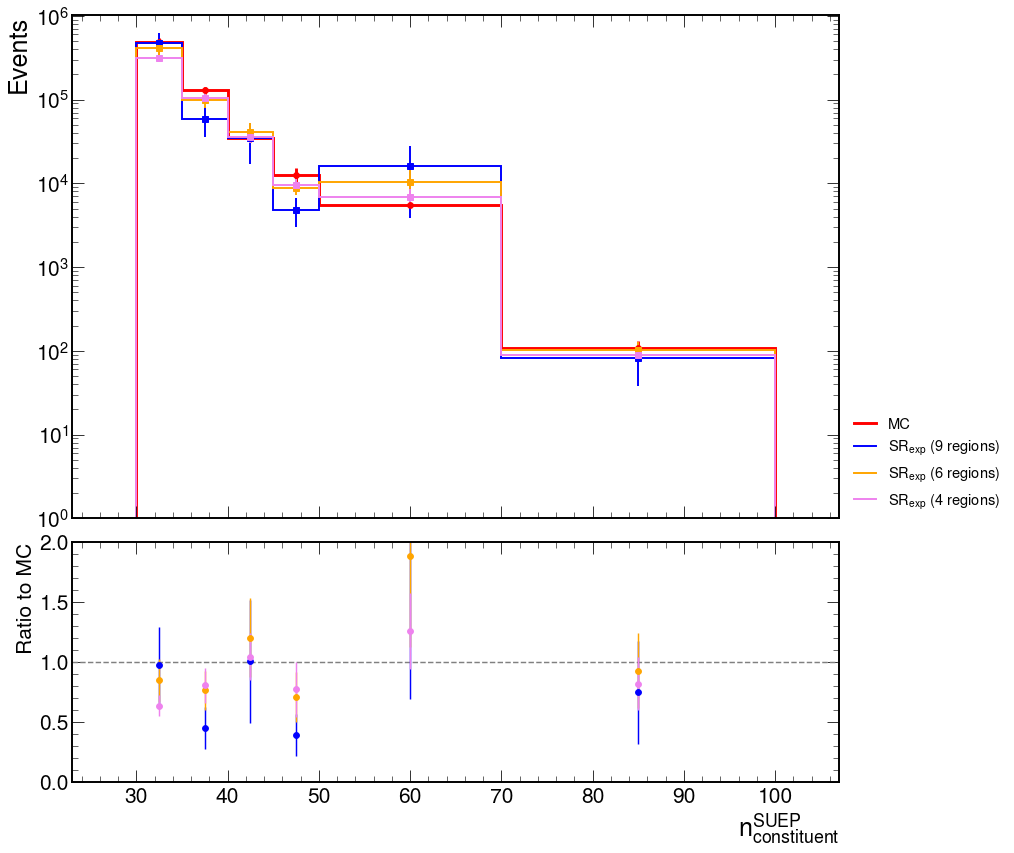

In [20]:
plot_label = "2D_SUEP_S1_vs_SUEP_nconst_VRGJhighS"

new_bins = [30, 35, 40, 45, 50, 70, 100]
#new_bins = [ 40, 45, 50, 70, 100]


rebin = True
# xregions9 = [[0.3j, 0.4j], [0.4j, 0.5j], [0.5j, 1.0j]]
# xregions6 = [[0.3j, 0.5j], [0.5j, 1.0j]]
# xregions4 = [[0.3j, 0.5j], [0.5j, 1.0j]]
# yregions9 = [[20j, 30j], [30j, 40j], [40j, 100j]]
# yregions6 = [[20j, 30j], [30j, 40j], [40j, 100j]]
# yregions4 = [[20j, 40j], [40j, 100j]]
# yregions9 = [[10j, 20j], [20j, 30j], [30j, 100j]]
# yregions6 = [[10j, 20j], [20j, 30j], [30j, 100j]]
# yregions4 = [[20j, 30j], [30j, 100j]]

xregions9 = [[0.3j, 0.4j], [0.4j, 0.5j], [0.5j, 1.0j]]
xregions6 = [[0.3j, 0.4j], [0.4j, 0.5j], [0.5j, 1.0j]]
xregions4 = [[0.3j, 0.5j], [0.5j, 1.0j]]
yregions9 = [[10j, 20j], [20j, 30j], [30j, 100j]]
yregions6 = [[20j, 30j], [30j, 100j]]
yregions4 = [[20j, 30j], [30j, 100j]]

sample = 'MC-VRGJ'

abcd = plots_vrgj[sample][plot_label][0.3j:, :100j]

SR, SR_exp = ABCD_9regions_errorProp(abcd, xregions9, yregions9, sum_var='x', approx=False, new_bins=new_bins)
_, SR_exp4 = ABCD_4regions_errorProp(abcd, xregions4, yregions4, sum_var='x', new_bins=new_bins)
_, SR_exp6 = ABCD_6regions_errorProp(abcd, xregions6, yregions6, sum_var='x', approx=True, new_bins=new_bins)

fig, axs = plot_ratio(
    [SR, SR_exp, SR_exp6, SR_exp4], labels=["MC", "$SR_{exp}$ (9 regions)", "$SR_{exp}$ (6 regions)", "$SR_{exp}$ (4 regions)"],
    cmap=['red', 'blue', 'orange', 'violet'],
    linewidth=[3, 2, 2, 2],
    linestyle=['-', '-', '-', '-'],
    fmt=['o', 's', 's', 's'],
)
_ = axs[1].set_ylim(0.0, 2.0)
_ = axs[0].set_ylim(1e0)
_ = axs[0].legend(loc=(1.01, 0), fontsize='xx-small')

### Reweight

Attempted to derive an event weight to reweight the gamma+jets events to match the SUEP or boson pT of the W+jets

In [ ]:
photon_pt = plots['GJets_HT']['photon_pt_VRGJ']
w_pt = plots['WJets']['W_pt_CRWJ']

ub = min(photon_pt.axes[0].edges[-1], w_pt.axes[0].edges[-1]) * 1.0j
lb = max(photon_pt.axes[0].edges[0], w_pt.axes[0].edges[0]) * 1.0j

photon_pt = photon_pt[lb:ub]
w_pt = w_pt[lb:ub]

w_pt = rebin_piecewise(w_pt, photon_pt.axes[0].edges)

ratio = w_pt.values() / photon_pt.values()

fig, ax = plt.subplots()
ax.scatter(photon_pt.axes[0].centers, ratio)
ax.axhline(1, color='black', linestyle='--')
ax.set_xlabel('$p^V_T$ [GeV]')
ax.set_ylabel('$p^W_T / p^\gamma_T$')

import correctionlib.schemav2 as cs
import correctionlib

corr = cs.Correction(
    name="ptweight",
    version=1,
    inputs=[
        cs.Variable(name="photon_pt", type="real", description="Photon transverse momentum"),
    ],
    output=cs.Variable(name="weight", type="real", description="Multiplicative event weight"),
    data=cs.Binning(
        nodetype="binning",
        input="photon_pt",
        edges=list(photon_pt.axes[0].edges),
        content=list(ratio),
        flow="clamp",
    ),
)

print(corr)

cset = correctionlib.schemav2.CorrectionSet(
    schema_version=2,
    description="Custom corrections to match photon pT to W pT",
    corrections=[
        corr,
    ],
)

with open("photon_pt_corr.json", "w") as fout:
    fout.write(cset.json(exclude_unset=True))

## B-tag Weights

We assume the following

- hadronFlavor: axis with 3 dimensions: bin0 = Light quarks, bin1 = Charm quarks, bin2 = Bottom quarks
- btag_category: axis with 3 dimensions: bin0 = fail Loose and Tight b-jet tagger, bin1 = pass Loose and fail Tight, bin2 = pass both Loose and Tight.

In [ ]:
from hist import Hist
from coffea.lookup_tools.dense_lookup import dense_lookup

plot_label = '4D_jets_pt_vs_jets_eta_vs_jets_hadronFlavor_vs_jets_btag_category_CRNoB'
sample = 'MC'
density = False

hadronFlavors_labels = ['Light', 'Charm', 'Bottom']
hadronFlavors_shortLabels = ['L', 'C', 'B'] # used to save the hists
btag_categories_labels = ['No b-tag', 'Loose b-tag', 'Tight b-tag']
btag_categories_shortLabels = [None, 'L', 'T'] # used to save the hists

effsFile = {}

for btag_category in range(len(plots[sample][plot_label].axes[-1])):

    if btag_category == 0: continue
    effsFile[btag_categories_shortLabels[btag_category]] = {}

    for hadronFlavor in range(len(plots[sample][plot_label].axes[-2])):

        effs = []
        effs_errs = []
        labels = []

        pt_centers = plots[sample][plot_label].axes[0].centers
        pt_bins = plots[sample][plot_label].axes[0].edges
        eta_bins = plots[sample][plot_label].axes[-3].edges
        for eta_bin in range(len(plots[sample][plot_label].axes[-3])):

            # eff = tagged as b-jet for this WP / total
            _pass = plots[sample][plot_label][:, eta_bin, hadronFlavor, btag_category::sum].values()
            _tot = plots[sample][plot_label][:, eta_bin, hadronFlavor, ::sum].values()

            _eff = np.where(_tot > 0, _pass / _tot, 0)
            _eff_err = np.sqrt(_eff * (1 - _eff) / _tot)
            _label = f"{sample} - {eta_bins[eta_bin]} < $\eta$ < {eta_bins[eta_bin+1]}"
            effs.append(_eff)
            effs_errs.append(_eff_err)
            labels.append(_label)

        fig = plt.figure()
        ax = fig.add_subplot()
        for e, l, err in zip(effs, labels, effs_errs):
            ax.scatter(pt_centers, e, label=l)
            ax.errorbar(pt_centers, e, linestyle='', yerr=err)

        region = plot_label.split("_")[-1]
        ax.text(0.97, 0.97, region,
                transform=ax.transAxes, 
                fontsize=24, fontweight='bold', va='top', ha='right')
        ax.legend(loc=(1.01, 0.0))
        ax.set_xlabel("Jet $p_T$ [GeV]")
        ax.set_ylabel("B-Tagging Efficiency")
        ax.set_title("Flavor: {}, WP: {}".format(hadronFlavors_labels[hadronFlavor], btag_categories_labels[btag_category]))

        h = Hist.new.Var(pt_bins).Var(eta_bins).Weight()
        h[:,:] = np.stack([np.array(effs).T, np.array(effs_errs).T], axis=-1)
        corr = dense_lookup(h.values(), [ax.edges for ax in h.axes[:]])

        effsFile[btag_categories_shortLabels[btag_category]][hadronFlavors_shortLabels[hadronFlavor]] = corr

        fig.show()
        plt.close()

print(effsFile)

# Save effsFile with pickle
with open('../data/BTagUL18/wh_crwj_eff.pickle', 'wb') as f:
    pickle.dump(effsFile, f)
with open('../data/BTagUL18/wh_crtt_eff.pickle', 'wb') as f:
    pickle.dump(effsFile, f)
with open('../data/BTagUL18/wh_sr_eff.pickle', 'wb') as f:
    pickle.dump(effsFile, f)

# General Plotting

## 1D Plots
Plot some of the 1D histograms for any number of samples in the same plot.<br>
Parameters:<br>
`plot_labels`: _list of str_, which plots to show.<br>
`samples`: _list of str_, which samples to include in the plot.<br>
`density`: _bool_, whether to plot histograms normalized to unity. <br>


In [ ]:
samples = [
    'SUEP-WH-mS125_T0.5_mPhi2.0_generic',
    'SUEP-WH-mS125_T2.0_mPhi2.0_generic',
    'SUEP-WH-mS125_T3.0_mPhi3.0_generic',
    'SUEP-WH-mS125_T4.0_mPhi4.0_generic',
    'SUEP-WH-mS125_T8.0_mPhi8.0_generic',
]

hb =  plots['MC']['3D_SUEP_S1_vs_ak4SUEP1_SUEP_BV_vs_SUEP_nconst_SR'][0.5j::sum,:,40j::sum]

fig, ax = plt.subplots()

for sample in samples:

    h = plots[sample]['3D_SUEP_S1_vs_ak4SUEP1_SUEP_BV_vs_SUEP_nconst_SR'][0.5j::sum,:,40j::sum]

    sigs = []
    for step in np.linspace(-0.9,1.0,100):
        s = h[:step*1.0j].sum().value
        b = hb[:step*1.0j].sum().value
        if b == 0: b = 2
        sig = np.sqrt(2*((s+b)*np.log(1+s/b)-s))
        print(step, s, b, sig)
        sigs.append(sig)

    ax.plot(np.linspace(-0.9,1.0,100), sigs, label=sample)
    
ax.legend(loc=(1.01, 0))
ax.set_ylabel("Significance")
ax.set_xlabel("BV(SUEP, jet)")
ax.set_ylim(0,40)
#ax.set_yscale("log")
fig.show()

In [ ]:
[k for k in plots['MC'].keys() if '3D' in k]

In [ ]:
samples = [
    'SUEP-WH-mS125_T0.5_mPhi2.0_generic',
    'SUEP-WH-mS125_T2.0_mPhi2.0_generic',
    'SUEP-WH-mS125_T3.0_mPhi3.0_generic',
    'SUEP-WH-mS125_T4.0_mPhi4.0_generic',
    'SUEP-WH-mS125_T8.0_mPhi8.0_generic',
]

hb =  plots['MC']['3D_SUEP_S1_vs_ak4jet1_inSUEPcluster_pt_vs_SUEP_nconst_SR'][0.5j::sum,:,40j::sum]

fig, ax = plt.subplots()

for sample in samples:

    h = plots[sample]['3D_SUEP_S1_vs_ak4jet1_inSUEPcluster_pt_vs_SUEP_nconst_SR'][0.5j::sum,:,40j::sum]

    sigs = []
    for step in np.linspace(30, 300, 300):
        s = h[:step*1.0j].sum().value
        b = hb[:step*1.0j].sum().value
        if b == 0: b = 2
        sig = np.sqrt(2*((s+b)*np.log(1+s/b)-s))
        print(step, s, b, sig)
        sigs.append(sig)

    ax.plot(np.linspace(30, 300, 300), sigs, label=sample)
    
ax.legend(loc=(1.01, 0))
ax.set_ylabel("Significance")
ax.set_xlabel("Leading jet pT")
ax.set_ylim(0,40)
#ax.set_yscale('log')
fig.show()

In [152]:
plots['GJets_HT']['otherAK15_maxPT_pt_VRGJlowS']

Hist(Regular(1000, 0, 200, name='otherAK15_maxPT_pt_VRGJlowS', label='$p^{\\mathrm{sub-leading~AK15}}_T$ [GeV]'), storage=Weight()) # Sum: WeightedSum(value=2.40003e+07, variance=3.83569e+08) (WeightedSum(value=2.40587e+07, variance=3.83589e+08) with flow)

In [165]:
print(plots['GJets_HT']['ht_VRGJlowS'][:540j].sum().value)
print(plots['GJets_HT']['ht_VRGJlowS'][:].sum().value)

23475693.704961605
23890201.720838487


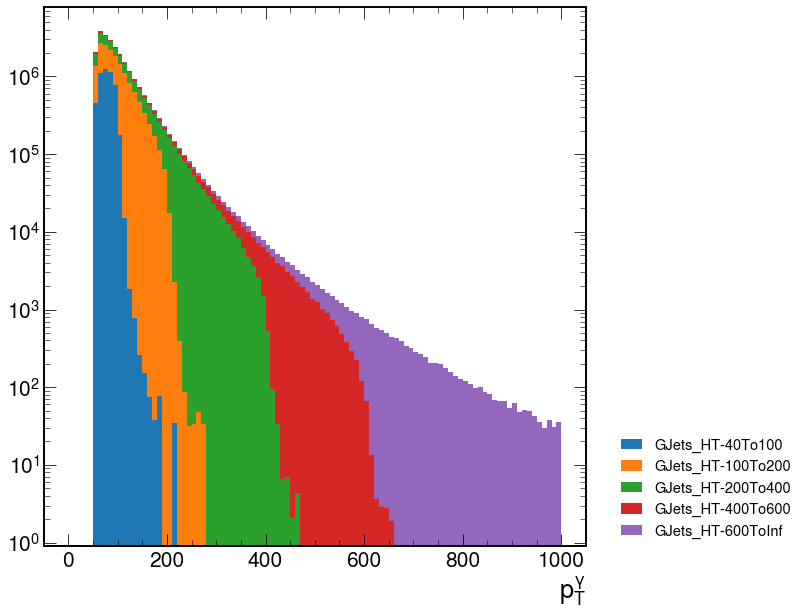

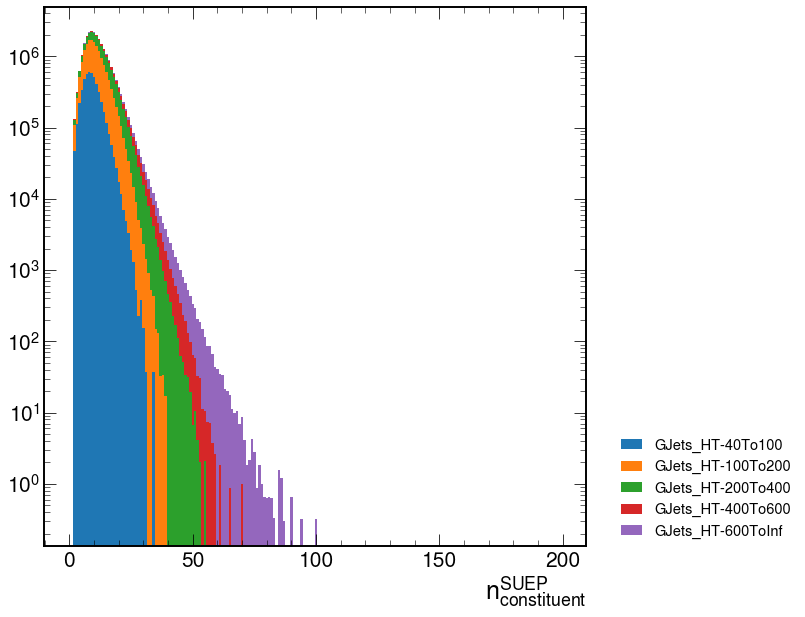

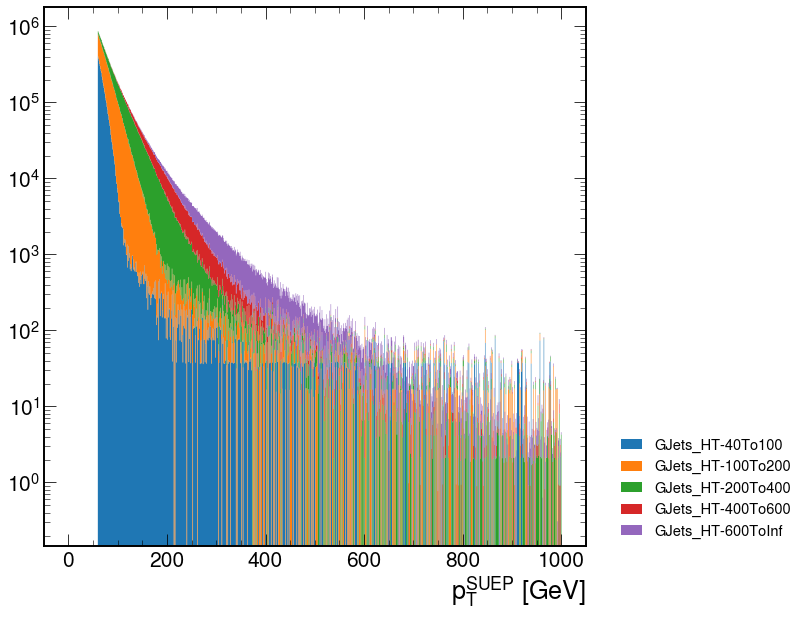

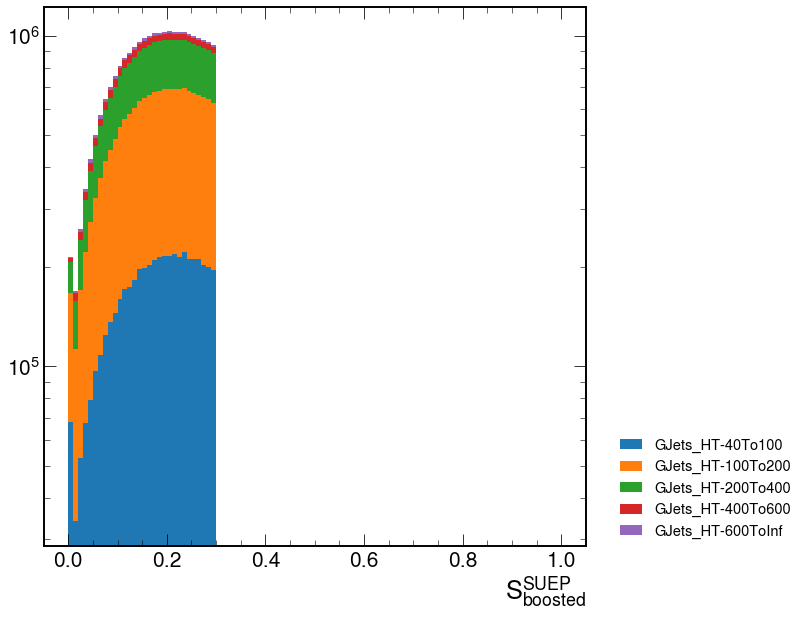

In [10]:
plot_labels = [
    'photon_pt_VRGJlowS',
    'SUEP_nconst_VRGJlowS',
    'SUEP_pt_VRGJlowS',
    'SUEP_S1_VRGJlowS',
]

samples = []
stacked_samples = [
    "GJets_HT-40To100",
    "GJets_HT-100To200",
    "GJets_HT-200To400",
    "GJets_HT-400To600",
    "GJets_HT-600ToInf",
]
new_bins = None
density = False
yerr = False
saveFigs = False

for plot_label in plot_labels:

    fig = plt.figure()
    ax = fig.add_subplot()

    h_samples = []
    h_stacked = []
    for sample in samples: 
        h = plots[sample][plot_label]
        if new_bins is not None: h = rebin_piecewise(h, new_bins)
        h_samples.append(h)

    for sample in stacked_samples:
        h = plots[sample][plot_label]
        if new_bins is not None: h = rebin_piecewise(h, new_bins)
        h_stacked.append(h)
     
    if len(h_stacked) > 0: hep.histplot(h_stacked, yerr=yerr, density=density, label=stacked_samples, stack=True, histtype='fill', ax=ax)
    if len(h_samples) > 0: hep.histplot(h_samples, yerr=yerr, density=density, label=samples, linestyle='dashed', linewidth=3, ax=ax)
        
    ax.legend(loc=(1.05,0), fontsize='xx-small')
    ax.set_yscale("log")
    #plt.ylim(1e-1, 1e5)
    #plt.xlim(0, 1000)

    #ax.axvline(150, c='black')

    region = plot_label.split("_")[-1]
    #plt.text(0.97, 0.97, region, transform=plt.gca().transAxes, fontsize=24, fontweight='bold', va='top', ha='right')

    # save and show
    if saveFigs:
        fig.savefig(output_label + plot_label + ".pdf", bbox_inches='tight')
        fig.savefig(output_label + plot_label + ".png", bbox_inches='tight')
    plt.show()


## 2D Plots

Plot some of the 2D histograms for any number of samples in the same plot.<br>
Parameters:<br>
`plot_label`: _str_, which plot to show.<br>
`samples`: _list of str_, which samples to include in the plot.<br>

In [ ]:
plot_label = '3D_SUEP_S1_vs_ak4jet1_inSUEPcluster_pt_vs_SUEP_nconst_SR'
samples = ['MC']

for sample in samples:
    
    if plots[sample][plot_label].sum().value == 0:
        print("Histogram empty for sample", sample)
        continue

    hep.hist2dplot(plots[sample][plot_label][0.2j:0.4j:sum,::10j,20j::5j], 
               norm=matplotlib.colors.LogNorm(),
               label=sample) 
        
    plt.ylim(0,100)
    plt.xlim(0,500)
    if saveFigs: plt.savefig(output_label + plot_label+ "_"+sample+file_ext)
    plt.show()

### 2D Hist Slices
Slice a 2D histogram and plot the slices; you can stack them and plot their densities.

(0.5, 2.0)

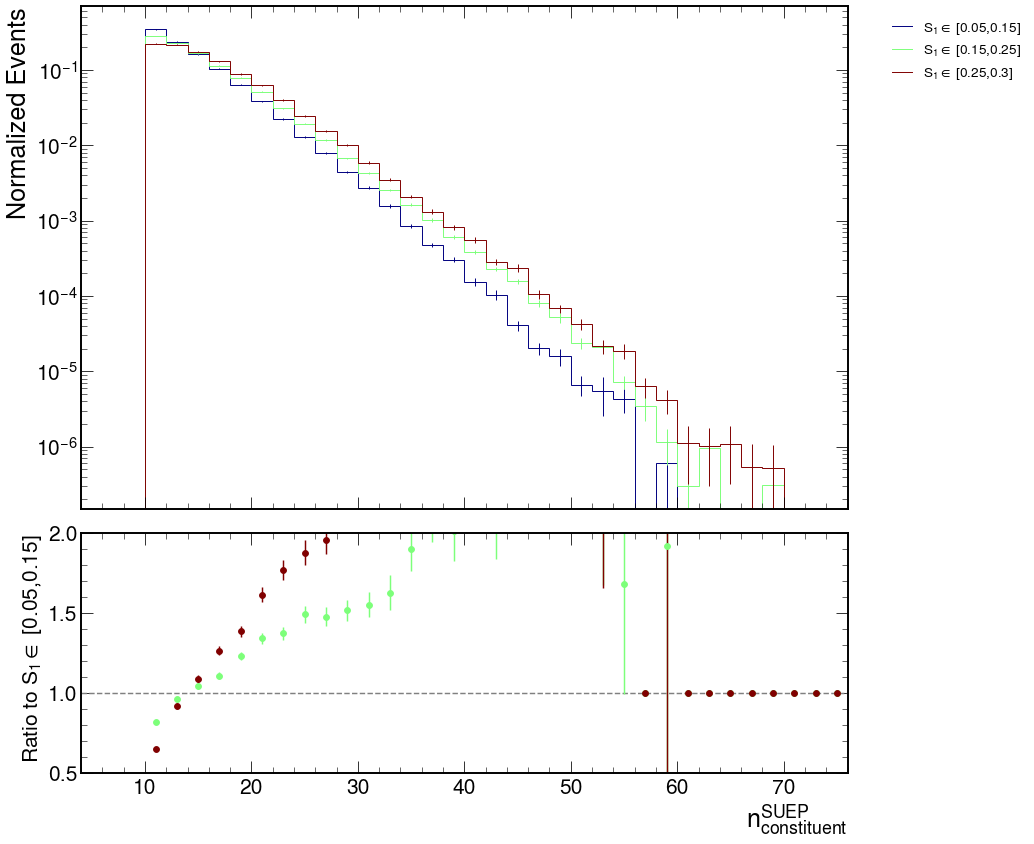

In [97]:
sample = 'GJets_HT'
slice_var = 'x'
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_VRGJ'
stack = False
density = True
ratio = True
regions_list  = [[0.05j,0.15j], [0.15j, 0.25j], [0.25j, 0.3j]]
#regions_list  = [[10j, 20j], [20j, 30j], [30j, 40j], [40j, 100j]]

#labels = ["$Jet~p_T "+" \in$ [{},{}]".format(round(regions[0].imag, 1), round(regions[1].imag, 1)) for regions in regions_list]
labels = ["$S_1 "+" \in$ [{},{}]".format(round(regions[0].imag, 2), round(regions[1].imag, 2)) for regions in regions_list]
#labels = ["$n^{SUEP}_{constituents} "+" \in$ [{},{}]".format(round(regions[0].imag, 1), round(regions[1].imag, 1)) for regions in regions_list]
#labels = ["BV(SUEP, jet) $\in$ [{},{}]".format(round(regions[0].imag, 1), round(regions[1].imag, 1)) for regions in regions_list]

h = plots[sample][plot_label][:, 10j::2j]
fig, axs = plot_sliced_hist2d(h, regions_list, density=density, stack=stack, slice_var=slice_var, labels=labels, ratio=ratio)
axs[1].set_ylim(0.5, 2.0)

## Ratios

In [ ]:
plots['MC']['MET_JEC_pt_CRWJ']

In [ ]:
samples = ['data', 'MC']
fig, axs = styled_plot_ratio(
    hlist=[plots[s]['MET_pt_CRWJ'] for s in samples],
    labels=samples,
    density=False,
)
axs[1].set_ylim(0.0, 2.0)

### Compare Samples

In [ ]:
plot_labels = [
    'ntracks_SR',
    'ngood_fastjets_SR',
    'ngood_ak4jets_SR',
    'lepton_pt_SR',
    'MET_pt_SR',
    'MET_JEC_pt_SR',
    'lepton_eta_SR',
    'W_pt_SR',
    'W_mt_SR',
    'lepton_pt_SR',
    'SUEP_pt_SR',
    'SUEP_S1_SR',
    'SUEP_nconst_SR',
    'deltaPhi_SUEP_W_SR',
    'deltaPhi_SUEP_MET_SR',
    'deltaPhi_lepton_SUEP_SR',
]
samples = ['DYJetsToLL_LHEFilterPtZ', 'WJetsToLNu_Pt']
stacked_samples = []
density = True
saveFigs = False

for plot_label in plot_labels:

    hlist = [plots[sample][plot_label][::] for sample in samples]
    stacked_hlist = [plots[sample][plot_label][::] for sample in stacked_samples]

    fig, axs = plot_ratio(hlist, samples, density=density, 
                          cmap=['black', 'darkblue'],
                          linewidth=[2]*len(samples))
    colors = plt.cm.rainbow(np.linspace(0, 1, len(stacked_hlist)))[::-1]
    if len(stacked_hlist) > 0: hep.histplot(stacked_hlist, histtype='fill', color=colors, label=stacked_samples, stack=True, ax=axs[0], zorder=0)
    axs[0].set_xlabel('')
    fig.set_size_inches(15, 18)

    axs[0].legend()
    axs[0].legend(loc=(1.01, 0.0), fontsize='xx-small')
    axs[1].set_ylim(0.0, 2.0)
    #axs[1].set_yscale('log')
    #axs[1].set_ylim(1e-3, 2e0)
    #axs[0].set_ylim(1e-1, 1e6)
    #axs[0].set_xlim(0, 1)

    if saveFigs: plt.savefig(output_label + plot_label + file_ext, bbox_inches='tight')
    plt.show()

### Compare Variables

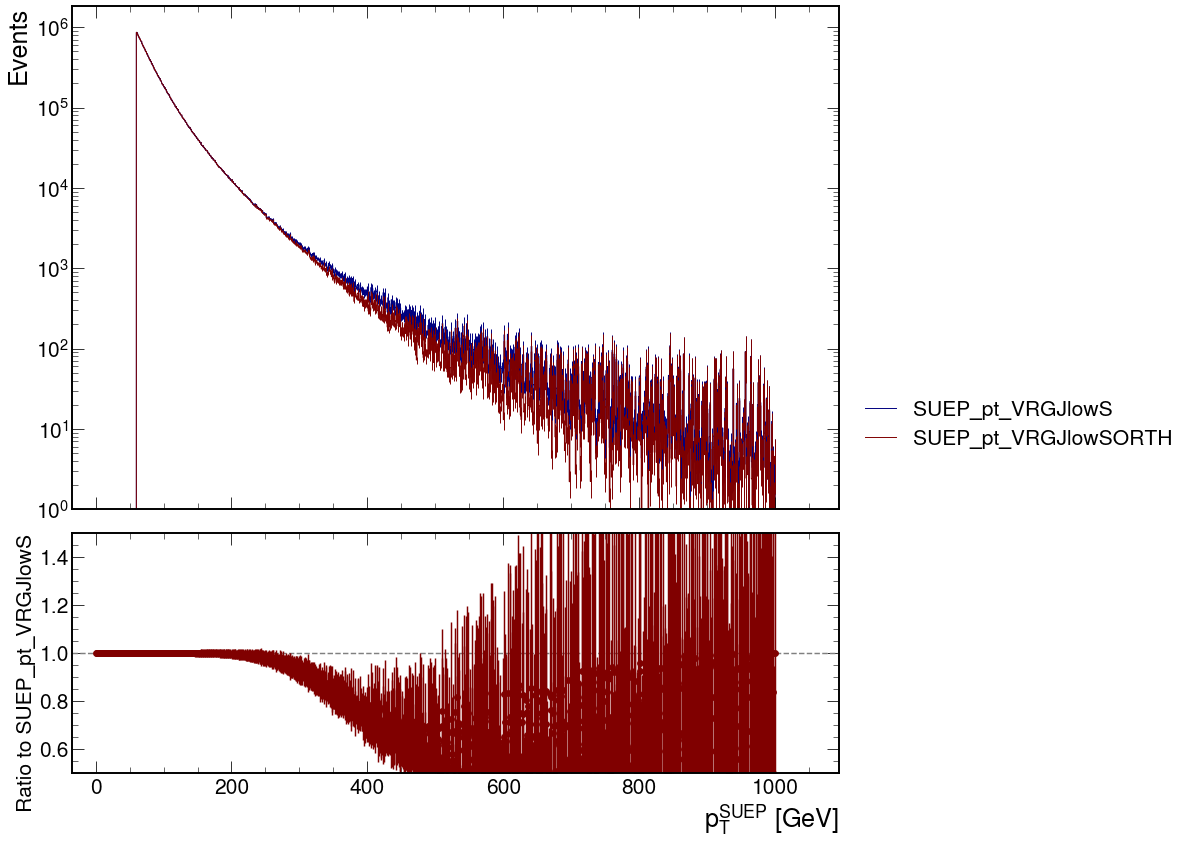

In [23]:
plot_labels = ['SUEP_pt_VRGJlowS', 'SUEP_pt_VRGJlowSORTH']
samples = ['GJets_HT']
density = False

hlist, labels = [], []
for plot_label in plot_labels:
    for sample in samples:
        hlist.append(plots[sample][plot_label][::])
        labels.append(sample + " - " + plot_label)

# our custom ratio calculates errors differently, more appropriate for plotting densities
fig, axs = plot_ratio(hlist, plot_labels, density=density)

axs[0].legend(loc=(1.02,0.1))
axs[1].set_ylim(0.5, 1.5)

if saveFigs: plt.savefig(output_label + "ratio_".join(plot_labels) + file_ext, bbox_inches='tight')
plt.show()

### Ratios of Slices
Slice a 2D histogram for both two samples or variables and plot ratio of each of the slices.

In [ ]:
h1 = plots['MC']["2D_SUEP_S1_vs_SUEP_nconst_SR"]
h2 = plots['SUEP-WH-M125.0_MD3.00_T3.00']["2D_SUEP_S1_vs_SUEP_nconst_SR"]

regions_list = [[30j,50j], [50j,70j], [70j,300j]]
h1_slices = slice_hist2d(h1, regions_list, slice_var='y')
h2_slices = slice_hist2d(h2, regions_list, slice_var='y')

for h1_slice, h2_slice, regions in zip(h1_slices, h2_slices, regions_list):
    
    h1_slice = h1_slice[:]
    h2_slice = h2_slice[:]
    
    h1_slice = h1_slice/h1_slice.sum().value
    h2_slice = h2_slice/h2_slice.sum().value
  
    fig, axs = plot_ratio([h1_slice, h2_slice], ['MC', 'SUEP-WH'], density=True)
    axs[0].legend()
    axs[1].set_ylim(0, 3)
    
    fig.suptitle("# Const. [{},{}]".format(int(regions[0].imag), int(regions[1].imag)))
    plt.show()

## Automatic Plotting
Plot all histograms and save them automatically.<br>

### All 1D and 2D Plots

In [ ]:
outdir = 'allplots/'
unstacked_samples = [
    'tt',
    'WJetsToLNu_Pt',
   'SUEP-WH-mS125_T0.5_mPhi2.0_generic',
    'SUEP-WH-mS125_T2.0_mPhi2.0_generic',
    'SUEP-WH-mS125_T3.0_mPhi3.0_generic',
    'SUEP-WH-mS125_T8.0_mPhi8.0_generic',
]
stacked_samples = []
density = True
yerr = False

all_samples = unstacked_samples + stacked_samples
plot_labels = [k for k in list(plots[all_samples[0]].keys())]
if not os.path.isdir(output_label+outdir): os.system("mkdir " + str(output_label+outdir))

for plot_label in plot_labels:
    print(plot_label, end=", ")

    if 'SR' not in plot_label: continue

    fig = plt.figure()
    ax = fig.add_subplot()
    
    # 2D plots
    if '2D' in plot_label:    
        for sample in stacked_samples:
            if plots[sample].get(plot_label, True) or plots[sample][plot_label].sum().value == 0:
                print("Histogram empty for sample", sample, end=", ")
                continue

            # plot each sample separately
            h = plots[sample][plot_label]
            hep.hist2dplot(h, 
                       norm=matplotlib.colors.LogNorm(),
                       label=sample,
                       ax=ax) 
            fig.savefig(output_label + outdir + plot_label+ "_"+sample+file_ext, bbox_inches='tight')
            plt.close()
        
    # 1D variables
    else:

        # plot all samples in same histogram
        stacked_hists, stacked_histlabels = [], []
        unstacked_hists, unstacked_histlabels = [], []
        for sample in all_samples:
            if plots[sample][plot_label].sum().value == 0:
                print("Histogram empty for sample", sample, end=", ")
                continue
        
        # plot everything
        for sample in all_samples:
            h = plots[sample][plot_label]
            if sample in stacked_samples: 
                stacked_hists.append(h)
                stacked_histlabels.append(sample)
            elif sample in unstacked_samples:
                unstacked_hists.append(h)
                unstacked_histlabels.append(sample)

        region = plot_label.split("_")[-1]
        ax.text(0.97, 0.97, region, transform=plt.gca().transAxes, fontsize=24, fontweight='bold', va='top', ha='right')

        if len(stacked_hists) > 0: hep.histplot(stacked_hists, label=stacked_histlabels, yerr=yerr, density=density, stack=True, histtype='fill', ax=ax)
        if len(unstacked_hists) > 0: hep.histplot(unstacked_hists, label=unstacked_histlabels, yerr=yerr, density=density, stack=False, histtype='step', ax=ax)
        if len(stacked_hists) > 0 or len(unstacked_hists) > 0:
            ax.legend(loc=(1.02,0), fontsize='xx-small')
            ax.set_yscale("log")
            #ax.set_ylim(1e-5,1e0)
            fig.savefig(output_label + 'allplots/' + plot_label + ".pdf", bbox_inches='tight')
            fig.savefig(output_label + 'allplots/' + plot_label + ".png", bbox_inches='tight')
        plt.close()

    plt.close()
    print()
print("All done")

### All Ratios: 1D Plots
For each 1D histogram, make a ratio plot between two samples.

In [ ]:
plot_labels = list(plots['QCD_HT_2018'].keys())
density = False
combos = [['QCD_HT_2018','data_2018']]

for l1, l2 in combos:
    
    outdir = l1+"_"+l2+"/"
    print(outdir)

    if not os.path.isdir(output_label+outdir): 
        os.system("mkdir " + str(output_label+outdir))

    for plot_label in plot_labels:

        if '2D' in plot_label: continue

        print(plot_label, end=", ")
        h1 = plots[l1][plot_label]
        h2 = plots[l2][plot_label]
        
        if h1.sum().value == 0 or h2.sum().value == 0: continue
        
        if density: 
            h1 = h1/h1.sum().value
            h2 = h2/h2.sum().value
            fig, axs, _ = plot_ratio(h1, h2, label1=l1, label2=l2)
            axs[0].legend()
        else:
            fig = plt.figure(figsize=(10, 8))
            _ = h1.plot_ratio(h2,
                             rp_num_label=l1,
                             rp_denom_label=l2)
            fig.axes[0].set_yscale("log")
            fig.axes[1].set_ylim(0.4,1.6)
            
        plt.savefig(output_label + outdir + plot_label +file_ext, bbox_inches='tight')
        plt.close()

    print("All done")

### All Ratios: Combined Regions

In [ ]:
density = True

plot_labels = list(plots['QCD_HT_2018'].keys())
combos = [['QCD_HT_2018','data_2018']]

for l1, l2 in combos:
    
    outdir = l1+"_"+l2+"_combinedRegions/"
    print(outdir)

    if not os.path.isdir(output_label+outdir): 
        os.system("mkdir " + str(output_label+outdir))

    for plot_label in plot_labels:

        if "A_" not in plot_label: continue
        print(plot_label, end=", ")
        
        h1 = plots[l1][plot_label.replace("A_", "")]
        h2 = plots[l2][plot_label.replace("A_", "")]
        if h1.sum().value == 0 or h2.sum().value == 0:
            print("Empty", end=", ")
            continue
            
        # x or y define order of regions
        x = 'ABCDEFGH'
        y = 'ADGBEHCF'
        _ = plot_ratio_regions(plots, plot_label, l1, l2, x, density=density)
        plt.savefig(output_label + outdir + plot_label +file_ext, bbox_inches='tight')
        plt.close()